<small><i>June 2019 - This notebook was created by [Oriol Pujol Vila](http://www.maia.ub.es/~oriol). Source and [license](./LICENSE.txt) info are in the folder.</i></small>

In [ ]:
#You may need to activate the environment tensorflow

#conda activate tensorflow

In [ ]:
#Install guide: https://github.com/jeffheaton/t81_558_deep_learning

In [10]:
# What version of Python do you have?
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf
import platform

print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Python Platform: macOS-12.2.1-arm64-arm-64bit
Tensor Flow Version: 2.9.2
Keras Version: 2.9.0

Python 3.9.13 | packaged by conda-forge | (main, May 27 2022, 17:00:33) 
[Clang 13.0.1 ]
Pandas 1.4.3
Scikit-Learn 1.1.2
GPU is available
Num GPUs Available:  1


# pill 13b. A story of deep learning

### 13b.1 Remember when...

This is not a new technique. We are talking of good old *neural networks* with very minor changes.

Remember what a neural network is:

A neural network is an ensemble technique. The idea is to combine very simple bricks together to build up a usually feedforward network.

The base functions are called neurons and are usually of the following form:

$$h(x) = \sigma({\bf w}^T {\bf x})$$

where $\sigma$ is a non-linear function. 

<img src = 'files/neuron.jpg' width = 400px>

And here comes the first change that helped deep learning to take off. This non-linear function was usually the sigmoid function:

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

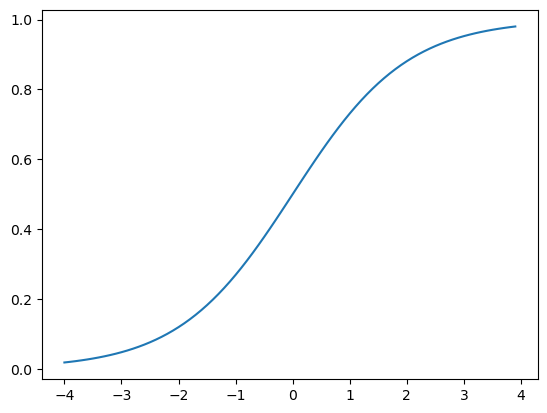

In [11]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.config.list_physical_devices('GPU')

x = np.arange(-4,4,0.1)
sig = tf.nn.sigmoid(1*x)

plt.plot(x,sig.numpy())

### 13b.2 Moving forward to "deep" representations

We can combine multiple layers of neurons. This will create a neural network. When the number of layers is sufficently large we call the network a *deep learner*. There are different kinds of NNs. In this basic tutorial we are concerned with NN composed of fully-connected layers.

<img src = 'files/NN.jpg' width = 500px>

The definition of a deep model requires the same steps as described before. They are:

- Define the architecture
- Define the loss function
- Define the optimization algorithm



## Fully connected architectures

In [12]:
from sklearn.datasets import load_digits
import numpy as np
data=load_digits()
X_train = data.data/16.
y_train = data.target

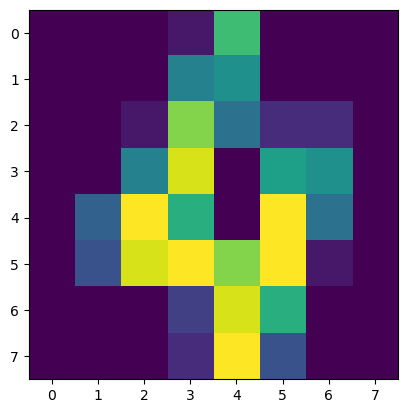

In [13]:
X_train[0,:]
import matplotlib.pyplot as plt

plt.imshow(X_train[4,:].reshape(8,8))

In [14]:
X_train.shape

(1797, 64)

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="sigmoid"),
    tf.keras.layers.Dense(40, activation="sigmoid"),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [16]:
model.fit(X_train, y_train, epochs=1000, batch_size = 128)

Epoch 1/1000
15/15 [==============================] - 0s 6ms/step - loss: 10.0910 - accuracy: 0.1007
Epoch 2/1000
 1/15 [=>............................] - ETA: 0s - loss: 8.1656 - accuracy: 0.1406

2022-08-25 18:13:38.593095: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 0s 5ms/step - loss: 8.2173 - accuracy: 0.1013
Epoch 3/1000
15/15 [==============================] - 0s 5ms/step - loss: 8.1632 - accuracy: 0.1013
Epoch 4/1000
15/15 [==============================] - 0s 5ms/step - loss: 8.2041 - accuracy: 0.1013
Epoch 5/1000
15/15 [==============================] - 0s 5ms/step - loss: 8.3118 - accuracy: 0.1013
Epoch 6/1000
15/15 [==============================] - 0s 5ms/step - loss: 8.2664 - accuracy: 0.1013
Epoch 7/1000
15/15 [==============================] - 0s 5ms/step - loss: 8.1347 - accuracy: 0.1013
Epoch 8/1000
15/15 [==============================] - 0s 5ms/step - loss: 8.0792 - accuracy: 0.1013
Epoch 9/1000
15/15 [==============================] - 0s 5ms/step - loss: 8.0670 - accuracy: 0.1013
Epoch 10/1000
15/15 [==============================] - 0s 5ms/step - loss: 8.0472 - accuracy: 0.1013
Epoch 11/1000
15/15 [==============================] - 0s 5ms/step - loss: 8.0405 - accuracy: 0.1013
Epoch 12/10

15/15 [==============================] - 0s 5ms/step - loss: 3.7598 - accuracy: 0.1102
Epoch 84/1000
15/15 [==============================] - 0s 5ms/step - loss: 3.6952 - accuracy: 0.1107
Epoch 85/1000
15/15 [==============================] - 0s 5ms/step - loss: 3.6811 - accuracy: 0.1080
Epoch 86/1000
15/15 [==============================] - 0s 6ms/step - loss: 3.6805 - accuracy: 0.1080
Epoch 87/1000
15/15 [==============================] - 0s 5ms/step - loss: 3.7545 - accuracy: 0.1074
Epoch 88/1000
15/15 [==============================] - 0s 5ms/step - loss: 3.6781 - accuracy: 0.1074
Epoch 89/1000
15/15 [==============================] - 0s 5ms/step - loss: 3.7953 - accuracy: 0.1080
Epoch 90/1000
15/15 [==============================] - 0s 5ms/step - loss: 3.7194 - accuracy: 0.1080
Epoch 91/1000
15/15 [==============================] - 0s 5ms/step - loss: 3.6795 - accuracy: 0.1063
Epoch 92/1000
15/15 [==============================] - 0s 5ms/step - loss: 3.7397 - accuracy: 0.1080
Epoc

15/15 [==============================] - 0s 5ms/step - loss: 3.5624 - accuracy: 0.1191
Epoch 164/1000
15/15 [==============================] - 0s 5ms/step - loss: 3.3881 - accuracy: 0.1141
Epoch 165/1000
15/15 [==============================] - 0s 5ms/step - loss: 3.4563 - accuracy: 0.1180
Epoch 166/1000
15/15 [==============================] - 0s 5ms/step - loss: 3.3050 - accuracy: 0.1157
Epoch 167/1000
15/15 [==============================] - 0s 5ms/step - loss: 3.3187 - accuracy: 0.1135
Epoch 168/1000
15/15 [==============================] - 0s 5ms/step - loss: 3.3154 - accuracy: 0.1163
Epoch 169/1000
15/15 [==============================] - 0s 5ms/step - loss: 3.2852 - accuracy: 0.1152
Epoch 170/1000
15/15 [==============================] - 0s 5ms/step - loss: 3.2593 - accuracy: 0.1169
Epoch 171/1000
15/15 [==============================] - 0s 5ms/step - loss: 3.3210 - accuracy: 0.1135
Epoch 172/1000
15/15 [==============================] - 0s 5ms/step - loss: 3.2713 - accuracy: 0.

15/15 [==============================] - 0s 5ms/step - loss: 3.0495 - accuracy: 0.1224
Epoch 244/1000
15/15 [==============================] - 0s 5ms/step - loss: 3.0257 - accuracy: 0.1219
Epoch 245/1000
15/15 [==============================] - 0s 5ms/step - loss: 2.9783 - accuracy: 0.1219
Epoch 246/1000
15/15 [==============================] - 0s 5ms/step - loss: 2.9835 - accuracy: 0.1219
Epoch 247/1000
15/15 [==============================] - 0s 5ms/step - loss: 2.9661 - accuracy: 0.1213
Epoch 248/1000
15/15 [==============================] - 0s 5ms/step - loss: 2.9783 - accuracy: 0.1224
Epoch 249/1000
15/15 [==============================] - 0s 5ms/step - loss: 3.1229 - accuracy: 0.1258
Epoch 250/1000
15/15 [==============================] - 0s 5ms/step - loss: 2.9361 - accuracy: 0.1208
Epoch 251/1000
15/15 [==============================] - 0s 5ms/step - loss: 2.9493 - accuracy: 0.1196
Epoch 252/1000
15/15 [==============================] - 0s 5ms/step - loss: 2.9182 - accuracy: 0.

15/15 [==============================] - 0s 5ms/step - loss: 2.3843 - accuracy: 0.1386
Epoch 324/1000
15/15 [==============================] - 0s 5ms/step - loss: 2.4698 - accuracy: 0.1380
Epoch 325/1000
15/15 [==============================] - 0s 5ms/step - loss: 2.3780 - accuracy: 0.1380
Epoch 326/1000
15/15 [==============================] - 0s 5ms/step - loss: 2.3721 - accuracy: 0.1386
Epoch 327/1000
15/15 [==============================] - 0s 6ms/step - loss: 2.3628 - accuracy: 0.1363
Epoch 328/1000
15/15 [==============================] - 0s 5ms/step - loss: 2.3440 - accuracy: 0.1430
Epoch 329/1000
15/15 [==============================] - 0s 5ms/step - loss: 2.3797 - accuracy: 0.1430
Epoch 330/1000
15/15 [==============================] - 0s 5ms/step - loss: 2.3409 - accuracy: 0.1386
Epoch 331/1000
15/15 [==============================] - 0s 5ms/step - loss: 2.3200 - accuracy: 0.1413
Epoch 332/1000
15/15 [==============================] - 0s 5ms/step - loss: 2.4040 - accuracy: 0.

15/15 [==============================] - 0s 5ms/step - loss: 1.8884 - accuracy: 0.1508
Epoch 404/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.9376 - accuracy: 0.1558
Epoch 405/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.9923 - accuracy: 0.1569
Epoch 406/1000
15/15 [==============================] - 0s 5ms/step - loss: 2.0533 - accuracy: 0.1503
Epoch 407/1000
15/15 [==============================] - 0s 6ms/step - loss: 1.8698 - accuracy: 0.1541
Epoch 408/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.8927 - accuracy: 0.1503
Epoch 409/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.8563 - accuracy: 0.1519
Epoch 410/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.8966 - accuracy: 0.1519
Epoch 411/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.8609 - accuracy: 0.1569
Epoch 412/1000
15/15 [==============================] - 0s 5ms/step - loss: 2.0997 - accuracy: 0.

15/15 [==============================] - 0s 5ms/step - loss: 1.6587 - accuracy: 0.1541
Epoch 484/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.6179 - accuracy: 0.1575
Epoch 485/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.6392 - accuracy: 0.1603
Epoch 486/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.5457 - accuracy: 0.1592
Epoch 487/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.6018 - accuracy: 0.1575
Epoch 488/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.5384 - accuracy: 0.1575
Epoch 489/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.5125 - accuracy: 0.1592
Epoch 490/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.5553 - accuracy: 0.1597
Epoch 491/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.6574 - accuracy: 0.1603
Epoch 492/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.5331 - accuracy: 0.

15/15 [==============================] - 0s 5ms/step - loss: 1.2965 - accuracy: 0.1664
Epoch 564/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.3181 - accuracy: 0.1647
Epoch 565/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.2813 - accuracy: 0.1630
Epoch 566/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.3058 - accuracy: 0.1636
Epoch 567/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.4488 - accuracy: 0.1630
Epoch 568/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.3918 - accuracy: 0.1636
Epoch 569/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.2706 - accuracy: 0.1625
Epoch 570/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.3030 - accuracy: 0.1625
Epoch 571/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.4026 - accuracy: 0.1564
Epoch 572/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.2939 - accuracy: 0.

15/15 [==============================] - 0s 5ms/step - loss: 1.1481 - accuracy: 0.1647
Epoch 644/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.1969 - accuracy: 0.1642
Epoch 645/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.1101 - accuracy: 0.1642
Epoch 646/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.1397 - accuracy: 0.1647
Epoch 647/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.1864 - accuracy: 0.1619
Epoch 648/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.2757 - accuracy: 0.1625
Epoch 649/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.3281 - accuracy: 0.1575
Epoch 650/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.1150 - accuracy: 0.1636
Epoch 651/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.1299 - accuracy: 0.1653
Epoch 652/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.1245 - accuracy: 0.

15/15 [==============================] - 0s 5ms/step - loss: 0.9928 - accuracy: 0.1636
Epoch 724/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.9992 - accuracy: 0.1681
Epoch 725/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.0338 - accuracy: 0.1636
Epoch 726/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.0334 - accuracy: 0.1692
Epoch 727/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.0756 - accuracy: 0.1647
Epoch 728/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.0534 - accuracy: 0.1664
Epoch 729/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.0037 - accuracy: 0.1669
Epoch 730/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.0828 - accuracy: 0.1608
Epoch 731/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.1644 - accuracy: 0.1592
Epoch 732/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.0100 - accuracy: 0.

15/15 [==============================] - 0s 5ms/step - loss: 0.9335 - accuracy: 0.1597
Epoch 804/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.9118 - accuracy: 0.1703
Epoch 805/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.0391 - accuracy: 0.1614
Epoch 806/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.9562 - accuracy: 0.1647
Epoch 807/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.8859 - accuracy: 0.1686
Epoch 808/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.9390 - accuracy: 0.1675
Epoch 809/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.9149 - accuracy: 0.1697
Epoch 810/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.8850 - accuracy: 0.1669
Epoch 811/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.8986 - accuracy: 0.1653
Epoch 812/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.8809 - accuracy: 0.

15/15 [==============================] - 0s 5ms/step - loss: 0.8349 - accuracy: 0.1664
Epoch 884/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.8208 - accuracy: 0.1664
Epoch 885/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.9012 - accuracy: 0.1630
Epoch 886/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.8702 - accuracy: 0.1664
Epoch 887/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.8299 - accuracy: 0.1681
Epoch 888/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.8218 - accuracy: 0.1669
Epoch 889/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.8405 - accuracy: 0.1653
Epoch 890/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.8340 - accuracy: 0.1636
Epoch 891/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.8301 - accuracy: 0.1675
Epoch 892/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.8339 - accuracy: 0.

15/15 [==============================] - 0s 5ms/step - loss: 0.8199 - accuracy: 0.1647
Epoch 964/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.7943 - accuracy: 0.1669
Epoch 965/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.8164 - accuracy: 0.1681
Epoch 966/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.8215 - accuracy: 0.1603
Epoch 967/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.8111 - accuracy: 0.1669
Epoch 968/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.7874 - accuracy: 0.1647
Epoch 969/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.7614 - accuracy: 0.1697
Epoch 970/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.7674 - accuracy: 0.1720
Epoch 971/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.7651 - accuracy: 0.1703
Epoch 972/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.7765 - accuracy: 0.

In [17]:
model.evaluate(X_train,  y_train, verbose=2)

57/57 - 0s - loss: 0.7560 - accuracy: 0.1669 - 224ms/epoch - 4ms/step


2022-08-25 18:14:54.517017: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[0.7559673190116882, 0.16694492101669312]

2/2 [==============================] - 0s 6ms/step


2022-08-25 18:14:54.745892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


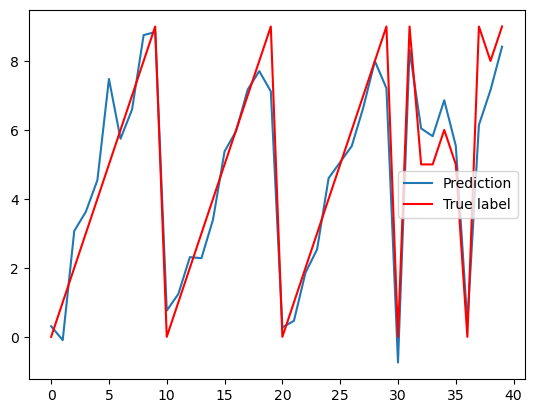

In [18]:
plt.plot(model.predict(X_train[0:40,:]),label = 'Prediction')
plt.plot(y_train[0:40],color='r',label='True label')
plt.legend()

**Observations:** It works pretty well, check the following:
- Each layer defines the number of units/neurons. This means that the output of a layer with 100 units is a 100-dimensional vector.
- The "inner" layers use the non-linearity, but the output layer is different! **Why?**
- We introduce or use the concept of **batch** and its corresponding size in the optimization algorithm. Remember that in our current setting we approximate the true loss by a noisy approximation by considering a subset of the data instead of the full dataset at each parameter update.
- We used "mean squared error" but this is useful for regression problems. What about classification as in this case?

**Let us fix some of these issues before moving to nowadays strategies:** For the case of the loss, we can change it to a different representation:

- The output instead of a single integer value can be split using one-hot-encoding. This can be interpreted as drawing a probability for each class. This means that the last layer must comply with the probability axioms. 

The most common technique for that is the use of soft-max layer. A **soft-max** is defined as follows:

$$\sigma(x_i) = \frac{e^x_i}{\sum_j e^{x_j}}$$

This adds up to one for all outputs and the outputs themselves are in the range $[0,1)$.

Then, if the outputs are interpreted as probabilities, it is sensible to use loss functions that optimize probability outputs. One of these is the **cross-entropy** defined as follows:

Given $t_i$ and $y_i$ the target label and the prediction of sample $i$, respectively, the cross-entropy loss is defined as,

$$\mathcal{L}(t_i,y_i) = -\sum_{c=1}^K t_i^c \log{y_i^c}, $$

where $c$ is the super-script indexing the vector component, i.e. the $c$-th component of the vector, and $K$ the number of classes.


In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="sigmoid"),
    tf.keras.layers.Dense(40, activation="sigmoid"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

But now we have to one-hot encode the outputs...

In [20]:
oh_y_train = tf.one_hot(y_train, 10)

In [21]:
model.fit(X_train, oh_y_train.numpy(), epochs=750, batch_size = 32)

Epoch 1/750


2022-08-25 18:14:55.031600: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


57/57 [==============================] - 1s 10ms/step - loss: 2.5043 - accuracy: 0.1013
Epoch 2/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3466 - accuracy: 0.1291
Epoch 3/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3154 - accuracy: 0.1029
Epoch 4/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3076 - accuracy: 0.0640
Epoch 5/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3052 - accuracy: 0.0991
Epoch 6/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3032 - accuracy: 0.1208
Epoch 7/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3014 - accuracy: 0.1480
Epoch 8/750
57/57 [==============================] - 0s 7ms/step - loss: 2.2998 - accuracy: 0.1514
Epoch 9/750
57/57 [==============================] - 0s 7ms/step - loss: 2.2980 - accuracy: 0.1408
Epoch 10/750
57/57 [==============================] - 0s 7ms/step - loss: 2.2964 - accuracy: 0.1491
Epoch 11/750
57/57 [

57/57 [==============================] - 0s 7ms/step - loss: 1.9921 - accuracy: 0.6505
Epoch 84/750
57/57 [==============================] - 0s 7ms/step - loss: 1.9813 - accuracy: 0.6733
Epoch 85/750
57/57 [==============================] - 0s 7ms/step - loss: 1.9706 - accuracy: 0.6578
Epoch 86/750
57/57 [==============================] - 0s 7ms/step - loss: 1.9591 - accuracy: 0.6711
Epoch 87/750
57/57 [==============================] - 0s 7ms/step - loss: 1.9478 - accuracy: 0.6950
Epoch 88/750
57/57 [==============================] - 0s 7ms/step - loss: 1.9364 - accuracy: 0.6516
Epoch 89/750
57/57 [==============================] - 0s 7ms/step - loss: 1.9243 - accuracy: 0.6533
Epoch 90/750
57/57 [==============================] - 0s 7ms/step - loss: 1.9116 - accuracy: 0.6555
Epoch 91/750
57/57 [==============================] - 0s 7ms/step - loss: 1.8996 - accuracy: 0.6567
Epoch 92/750
57/57 [==============================] - 0s 7ms/step - loss: 1.8866 - accuracy: 0.6617
Epoch 93/750


57/57 [==============================] - 0s 7ms/step - loss: 0.9735 - accuracy: 0.7869
Epoch 165/750
57/57 [==============================] - 0s 7ms/step - loss: 0.9654 - accuracy: 0.7863
Epoch 166/750
57/57 [==============================] - 0s 7ms/step - loss: 0.9574 - accuracy: 0.7919
Epoch 167/750
57/57 [==============================] - 0s 6ms/step - loss: 0.9495 - accuracy: 0.7880
Epoch 168/750
57/57 [==============================] - 0s 7ms/step - loss: 0.9419 - accuracy: 0.7930
Epoch 169/750
57/57 [==============================] - 0s 7ms/step - loss: 0.9342 - accuracy: 0.7974
Epoch 170/750
57/57 [==============================] - 0s 7ms/step - loss: 0.9264 - accuracy: 0.8013
Epoch 171/750
57/57 [==============================] - 0s 7ms/step - loss: 0.9191 - accuracy: 0.7986
Epoch 172/750
57/57 [==============================] - 0s 7ms/step - loss: 0.9119 - accuracy: 0.7974
Epoch 173/750
57/57 [==============================] - 0s 7ms/step - loss: 0.9044 - accuracy: 0.7986
Epoc

57/57 [==============================] - 0s 6ms/step - loss: 0.5694 - accuracy: 0.8625
Epoch 246/750
57/57 [==============================] - 0s 7ms/step - loss: 0.5665 - accuracy: 0.8620
Epoch 247/750
57/57 [==============================] - 0s 7ms/step - loss: 0.5636 - accuracy: 0.8620
Epoch 248/750
57/57 [==============================] - 0s 7ms/step - loss: 0.5608 - accuracy: 0.8653
Epoch 249/750
57/57 [==============================] - 0s 6ms/step - loss: 0.5580 - accuracy: 0.8659
Epoch 250/750
57/57 [==============================] - 0s 7ms/step - loss: 0.5551 - accuracy: 0.8670
Epoch 251/750
57/57 [==============================] - 0s 6ms/step - loss: 0.5525 - accuracy: 0.8659
Epoch 252/750
57/57 [==============================] - 0s 7ms/step - loss: 0.5497 - accuracy: 0.8659
Epoch 253/750
57/57 [==============================] - 0s 7ms/step - loss: 0.5471 - accuracy: 0.8676
Epoch 254/750
57/57 [==============================] - 0s 7ms/step - loss: 0.5444 - accuracy: 0.8676
Epoc

57/57 [==============================] - 0s 7ms/step - loss: 0.4022 - accuracy: 0.8987
Epoch 327/750
57/57 [==============================] - 0s 7ms/step - loss: 0.4004 - accuracy: 0.8987
Epoch 328/750
57/57 [==============================] - 0s 7ms/step - loss: 0.3988 - accuracy: 0.8993
Epoch 329/750
57/57 [==============================] - 0s 7ms/step - loss: 0.3974 - accuracy: 0.8998
Epoch 330/750
57/57 [==============================] - 0s 7ms/step - loss: 0.3961 - accuracy: 0.8993
Epoch 331/750
57/57 [==============================] - 0s 7ms/step - loss: 0.3943 - accuracy: 0.9026
Epoch 332/750
57/57 [==============================] - 0s 7ms/step - loss: 0.3929 - accuracy: 0.9021
Epoch 333/750
57/57 [==============================] - 0s 7ms/step - loss: 0.3914 - accuracy: 0.9026
Epoch 334/750
57/57 [==============================] - 0s 7ms/step - loss: 0.3899 - accuracy: 0.9026
Epoch 335/750
57/57 [==============================] - 0s 7ms/step - loss: 0.3884 - accuracy: 0.9037
Epoc

57/57 [==============================] - 0s 7ms/step - loss: 0.3001 - accuracy: 0.9277
Epoch 408/750
57/57 [==============================] - 0s 7ms/step - loss: 0.2992 - accuracy: 0.9277
Epoch 409/750
57/57 [==============================] - 0s 7ms/step - loss: 0.2980 - accuracy: 0.9288
Epoch 410/750
57/57 [==============================] - 0s 7ms/step - loss: 0.2972 - accuracy: 0.9288
Epoch 411/750
57/57 [==============================] - 0s 7ms/step - loss: 0.2960 - accuracy: 0.9293
Epoch 412/750
57/57 [==============================] - 0s 7ms/step - loss: 0.2949 - accuracy: 0.9282
Epoch 413/750
57/57 [==============================] - 0s 7ms/step - loss: 0.2939 - accuracy: 0.9293
Epoch 414/750
57/57 [==============================] - 0s 7ms/step - loss: 0.2930 - accuracy: 0.9293
Epoch 415/750
57/57 [==============================] - 0s 7ms/step - loss: 0.2919 - accuracy: 0.9282
Epoch 416/750
57/57 [==============================] - 0s 7ms/step - loss: 0.2910 - accuracy: 0.9299
Epoc

57/57 [==============================] - 0s 8ms/step - loss: 0.2312 - accuracy: 0.9482
Epoch 489/750
57/57 [==============================] - 0s 7ms/step - loss: 0.2303 - accuracy: 0.9482
Epoch 490/750
57/57 [==============================] - 0s 7ms/step - loss: 0.2296 - accuracy: 0.9482
Epoch 491/750
57/57 [==============================] - 0s 7ms/step - loss: 0.2289 - accuracy: 0.9510
Epoch 492/750
57/57 [==============================] - 0s 7ms/step - loss: 0.2283 - accuracy: 0.9488
Epoch 493/750
57/57 [==============================] - 0s 7ms/step - loss: 0.2277 - accuracy: 0.9471
Epoch 494/750
57/57 [==============================] - 0s 7ms/step - loss: 0.2268 - accuracy: 0.9488
Epoch 495/750
57/57 [==============================] - 0s 7ms/step - loss: 0.2263 - accuracy: 0.9505
Epoch 496/750
57/57 [==============================] - 0s 7ms/step - loss: 0.2256 - accuracy: 0.9494
Epoch 497/750
57/57 [==============================] - 0s 7ms/step - loss: 0.2249 - accuracy: 0.9505
Epoc

57/57 [==============================] - 0s 7ms/step - loss: 0.1851 - accuracy: 0.9633
Epoch 570/750
57/57 [==============================] - 0s 7ms/step - loss: 0.1847 - accuracy: 0.9627
Epoch 571/750
57/57 [==============================] - 0s 7ms/step - loss: 0.1843 - accuracy: 0.9627
Epoch 572/750
57/57 [==============================] - 0s 7ms/step - loss: 0.1837 - accuracy: 0.9627
Epoch 573/750
57/57 [==============================] - 0s 7ms/step - loss: 0.1834 - accuracy: 0.9633
Epoch 574/750
57/57 [==============================] - 0s 7ms/step - loss: 0.1829 - accuracy: 0.9638
Epoch 575/750
57/57 [==============================] - 0s 7ms/step - loss: 0.1824 - accuracy: 0.9633
Epoch 576/750
57/57 [==============================] - 0s 7ms/step - loss: 0.1820 - accuracy: 0.9638
Epoch 577/750
57/57 [==============================] - 0s 7ms/step - loss: 0.1816 - accuracy: 0.9638
Epoch 578/750
57/57 [==============================] - 0s 7ms/step - loss: 0.1811 - accuracy: 0.9638
Epoc

57/57 [==============================] - 0s 7ms/step - loss: 0.1545 - accuracy: 0.9666
Epoch 651/750
57/57 [==============================] - 0s 8ms/step - loss: 0.1541 - accuracy: 0.9666
Epoch 652/750
57/57 [==============================] - 0s 8ms/step - loss: 0.1539 - accuracy: 0.9666
Epoch 653/750
57/57 [==============================] - 0s 8ms/step - loss: 0.1535 - accuracy: 0.9666
Epoch 654/750
57/57 [==============================] - 0s 8ms/step - loss: 0.1531 - accuracy: 0.9661
Epoch 655/750
57/57 [==============================] - 0s 7ms/step - loss: 0.1529 - accuracy: 0.9666
Epoch 656/750
57/57 [==============================] - 0s 7ms/step - loss: 0.1527 - accuracy: 0.9666
Epoch 657/750
57/57 [==============================] - 0s 7ms/step - loss: 0.1522 - accuracy: 0.9666
Epoch 658/750
57/57 [==============================] - 0s 7ms/step - loss: 0.1521 - accuracy: 0.9666
Epoch 659/750
57/57 [==============================] - 0s 7ms/step - loss: 0.1517 - accuracy: 0.9661
Epoc

57/57 [==============================] - 0s 7ms/step - loss: 0.1331 - accuracy: 0.9688
Epoch 732/750
57/57 [==============================] - 0s 7ms/step - loss: 0.1328 - accuracy: 0.9694
Epoch 733/750
57/57 [==============================] - 0s 7ms/step - loss: 0.1326 - accuracy: 0.9694
Epoch 734/750
57/57 [==============================] - 0s 7ms/step - loss: 0.1323 - accuracy: 0.9705
Epoch 735/750
57/57 [==============================] - 0s 7ms/step - loss: 0.1321 - accuracy: 0.9694
Epoch 736/750
57/57 [==============================] - 0s 7ms/step - loss: 0.1319 - accuracy: 0.9694
Epoch 737/750
57/57 [==============================] - 0s 7ms/step - loss: 0.1317 - accuracy: 0.9694
Epoch 738/750
57/57 [==============================] - 0s 7ms/step - loss: 0.1315 - accuracy: 0.9688
Epoch 739/750
57/57 [==============================] - 0s 7ms/step - loss: 0.1312 - accuracy: 0.9694
Epoch 740/750
57/57 [==============================] - 0s 7ms/step - loss: 0.1310 - accuracy: 0.9688
Epoc

2/2 [==============================] - 0s 8ms/step


2022-08-25 18:19:43.384630: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


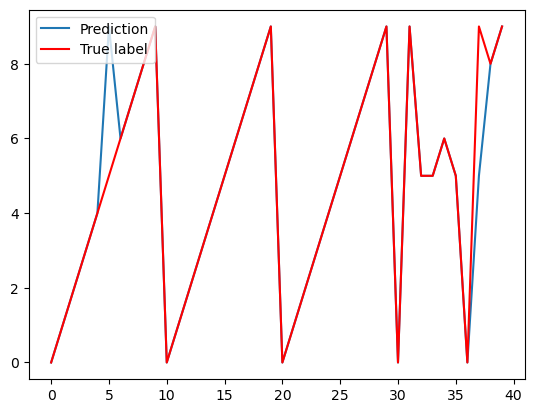

In [22]:
plt.plot(np.argmax(model.predict(X_train[0:40,:]),axis=1),label = 'Prediction')
plt.plot(y_train[0:40],color='r',label='True label')
plt.legend()

In [23]:
model.evaluate(X_train,  oh_y_train.numpy(), verbose=2)

2022-08-25 18:19:43.564156: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


57/57 - 0s - loss: 0.1284 - accuracy: 0.9711 - 391ms/epoch - 7ms/step


[0.12841492891311646, 0.9710628986358643]

## Deep learning ... deep problems

### PROBLEM 1: Dead neurons and vanishing gradients.

Let us add more layers. We will expect that we may learn even better.

In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="sigmoid"),
    tf.keras.layers.Dense(40, activation="sigmoid"),
    tf.keras.layers.Dense(40, activation="sigmoid"),
    tf.keras.layers.Dense(40, activation="sigmoid"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

oh_y_train = tf.one_hot(y_train, 10)

model.fit(X_train, oh_y_train.numpy(), epochs=750, batch_size = 32)

Epoch 1/750
14/57 [======>.......................] - ETA: 0s - loss: 2.5421 - accuracy: 0.1205

2022-08-25 18:19:44.105111: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


57/57 [==============================] - 1s 9ms/step - loss: 2.4868 - accuracy: 0.1007
Epoch 2/750
57/57 [==============================] - 0s 8ms/step - loss: 2.3561 - accuracy: 0.0968
Epoch 3/750
57/57 [==============================] - 0s 8ms/step - loss: 2.3191 - accuracy: 0.0991
Epoch 4/750
57/57 [==============================] - 0s 8ms/step - loss: 2.3089 - accuracy: 0.0902
Epoch 5/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3055 - accuracy: 0.0963
Epoch 6/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3045 - accuracy: 0.0790
Epoch 7/750
57/57 [==============================] - 0s 8ms/step - loss: 2.3042 - accuracy: 0.0801
Epoch 8/750
57/57 [==============================] - 0s 8ms/step - loss: 2.3042 - accuracy: 0.0924
Epoch 9/750
57/57 [==============================] - 0s 8ms/step - loss: 2.3040 - accuracy: 0.1013
Epoch 10/750
57/57 [==============================] - 0s 8ms/step - loss: 2.3041 - accuracy: 0.0952
Epoch 11/750
57/57 [=

57/57 [==============================] - 0s 7ms/step - loss: 2.3038 - accuracy: 0.0935
Epoch 84/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3038 - accuracy: 0.0940
Epoch 85/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3037 - accuracy: 0.1013
Epoch 86/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3037 - accuracy: 0.0918
Epoch 87/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3038 - accuracy: 0.0929
Epoch 88/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3037 - accuracy: 0.0946
Epoch 89/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3036 - accuracy: 0.0952
Epoch 90/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3035 - accuracy: 0.0896
Epoch 91/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3035 - accuracy: 0.0996
Epoch 92/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3035 - accuracy: 0.0996
Epoch 93/750


57/57 [==============================] - 0s 7ms/step - loss: 2.3030 - accuracy: 0.1024
Epoch 165/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3030 - accuracy: 0.0974
Epoch 166/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3032 - accuracy: 0.0974
Epoch 167/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3030 - accuracy: 0.0952
Epoch 168/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3031 - accuracy: 0.1029
Epoch 169/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3031 - accuracy: 0.0935
Epoch 170/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3030 - accuracy: 0.0952
Epoch 171/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3030 - accuracy: 0.0996
Epoch 172/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3030 - accuracy: 0.0963
Epoch 173/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3029 - accuracy: 0.0924
Epoc

57/57 [==============================] - 0s 7ms/step - loss: 2.3025 - accuracy: 0.0991
Epoch 246/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3022 - accuracy: 0.1085
Epoch 247/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3024 - accuracy: 0.0940
Epoch 248/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3024 - accuracy: 0.1007
Epoch 249/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3023 - accuracy: 0.0996
Epoch 250/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3025 - accuracy: 0.1035
Epoch 251/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3024 - accuracy: 0.1013
Epoch 252/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3023 - accuracy: 0.1057
Epoch 253/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3023 - accuracy: 0.1041
Epoch 254/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3024 - accuracy: 0.1013
Epoc

57/57 [==============================] - 0s 7ms/step - loss: 2.3015 - accuracy: 0.1007
Epoch 327/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3018 - accuracy: 0.1063
Epoch 328/750
57/57 [==============================] - 0s 8ms/step - loss: 2.3016 - accuracy: 0.0996
Epoch 329/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3017 - accuracy: 0.1119
Epoch 330/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3018 - accuracy: 0.1052
Epoch 331/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3015 - accuracy: 0.1024
Epoch 332/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3016 - accuracy: 0.1196
Epoch 333/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3016 - accuracy: 0.1029
Epoch 334/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3017 - accuracy: 0.1080
Epoch 335/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3016 - accuracy: 0.1024
Epoc

57/57 [==============================] - 0s 7ms/step - loss: 2.3008 - accuracy: 0.1252
Epoch 408/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3006 - accuracy: 0.1024
Epoch 409/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3006 - accuracy: 0.1102
Epoch 410/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3006 - accuracy: 0.1107
Epoch 411/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3005 - accuracy: 0.1046
Epoch 412/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3005 - accuracy: 0.1057
Epoch 413/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3006 - accuracy: 0.1135
Epoch 414/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3008 - accuracy: 0.1091
Epoch 415/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3005 - accuracy: 0.1274
Epoch 416/750
57/57 [==============================] - 0s 7ms/step - loss: 2.3005 - accuracy: 0.1068
Epoc

57/57 [==============================] - 0s 7ms/step - loss: 2.2993 - accuracy: 0.1258
Epoch 489/750
57/57 [==============================] - 0s 7ms/step - loss: 2.2991 - accuracy: 0.1224
Epoch 490/750
57/57 [==============================] - 0s 7ms/step - loss: 2.2992 - accuracy: 0.1397
Epoch 491/750
57/57 [==============================] - 0s 7ms/step - loss: 2.2991 - accuracy: 0.1224
Epoch 492/750
57/57 [==============================] - 0s 7ms/step - loss: 2.2989 - accuracy: 0.1302
Epoch 493/750
57/57 [==============================] - 0s 7ms/step - loss: 2.2990 - accuracy: 0.1363
Epoch 494/750
57/57 [==============================] - 0s 8ms/step - loss: 2.2989 - accuracy: 0.1397
Epoch 495/750
57/57 [==============================] - 0s 8ms/step - loss: 2.2990 - accuracy: 0.1425
Epoch 496/750
57/57 [==============================] - 0s 8ms/step - loss: 2.2990 - accuracy: 0.1107
Epoch 497/750
57/57 [==============================] - 0s 7ms/step - loss: 2.2990 - accuracy: 0.1096
Epoc

57/57 [==============================] - 0s 7ms/step - loss: 2.2966 - accuracy: 0.1146
Epoch 570/750
57/57 [==============================] - 0s 7ms/step - loss: 2.2968 - accuracy: 0.1402
Epoch 571/750
57/57 [==============================] - 0s 7ms/step - loss: 2.2970 - accuracy: 0.1191
Epoch 572/750
57/57 [==============================] - 0s 7ms/step - loss: 2.2967 - accuracy: 0.1313
Epoch 573/750
57/57 [==============================] - 0s 7ms/step - loss: 2.2969 - accuracy: 0.1285
Epoch 574/750
57/57 [==============================] - 0s 7ms/step - loss: 2.2965 - accuracy: 0.1742
Epoch 575/750
57/57 [==============================] - 0s 7ms/step - loss: 2.2967 - accuracy: 0.1247
Epoch 576/750
57/57 [==============================] - 0s 7ms/step - loss: 2.2967 - accuracy: 0.1575
Epoch 577/750
57/57 [==============================] - 0s 7ms/step - loss: 2.2965 - accuracy: 0.1942
Epoch 578/750
57/57 [==============================] - 0s 7ms/step - loss: 2.2965 - accuracy: 0.1519
Epoc

57/57 [==============================] - 0s 7ms/step - loss: 2.2926 - accuracy: 0.2337
Epoch 651/750
57/57 [==============================] - 0s 7ms/step - loss: 2.2924 - accuracy: 0.1886
Epoch 652/750
57/57 [==============================] - 0s 7ms/step - loss: 2.2924 - accuracy: 0.1547
Epoch 653/750
57/57 [==============================] - 0s 7ms/step - loss: 2.2924 - accuracy: 0.1831
Epoch 654/750
57/57 [==============================] - 0s 7ms/step - loss: 2.2923 - accuracy: 0.2259
Epoch 655/750
57/57 [==============================] - 0s 7ms/step - loss: 2.2920 - accuracy: 0.1942
Epoch 656/750
57/57 [==============================] - 0s 7ms/step - loss: 2.2920 - accuracy: 0.2193
Epoch 657/750
57/57 [==============================] - 0s 7ms/step - loss: 2.2920 - accuracy: 0.1981
Epoch 658/750
57/57 [==============================] - 0s 7ms/step - loss: 2.2918 - accuracy: 0.2154
Epoch 659/750
57/57 [==============================] - 0s 7ms/step - loss: 2.2918 - accuracy: 0.1397
Epoc

57/57 [==============================] - 0s 7ms/step - loss: 2.2822 - accuracy: 0.2621
Epoch 732/750
57/57 [==============================] - 0s 7ms/step - loss: 2.2821 - accuracy: 0.3166
Epoch 733/750
57/57 [==============================] - 0s 7ms/step - loss: 2.2816 - accuracy: 0.3005
Epoch 734/750
57/57 [==============================] - 0s 7ms/step - loss: 2.2815 - accuracy: 0.2799
Epoch 735/750
57/57 [==============================] - 0s 7ms/step - loss: 2.2813 - accuracy: 0.2682
Epoch 736/750
57/57 [==============================] - 0s 8ms/step - loss: 2.2810 - accuracy: 0.2677
Epoch 737/750
57/57 [==============================] - 0s 7ms/step - loss: 2.2807 - accuracy: 0.3044
Epoch 738/750
57/57 [==============================] - 0s 7ms/step - loss: 2.2804 - accuracy: 0.2760
Epoch 739/750
57/57 [==============================] - 0s 7ms/step - loss: 2.2803 - accuracy: 0.3534
Epoch 740/750
57/57 [==============================] - 0s 7ms/step - loss: 2.2800 - accuracy: 0.2888
Epoc

2/2 [==============================] - 0s 11ms/step


2022-08-25 18:24:57.753874: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


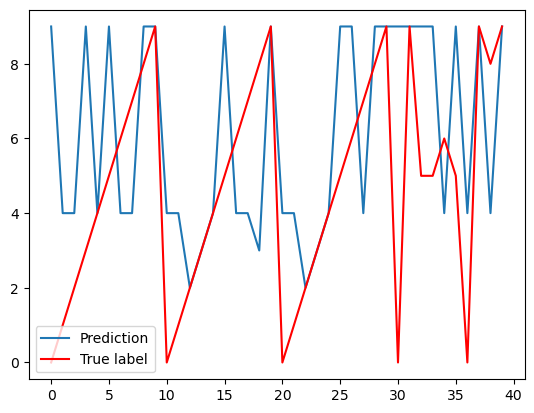

In [25]:
plt.plot(np.argmax(model.predict(X_train[0:40,:]),axis=1),label = 'Prediction')
plt.plot(y_train[0:40],color='r',label='True label')
plt.legend()

In [26]:
model.evaluate(X_train,  oh_y_train.numpy(), verbose=2)

2022-08-25 18:24:57.918639: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


57/57 - 0s - loss: 2.2759 - accuracy: 0.2922 - 393ms/epoch - 7ms/step


[2.2759459018707275, 0.29215359687805176]

<div class = "alert alert-danger" style = "border-radius:10px;border-width:3px"><b> Question:</b>What is wrong??????</div>



The problem lays in the neuron model and its working regime. This gives rise to the problem of  of **vanishing gradients** and **dead neurons** when learning the network. A simple way of solving this problem is to let the neuron model output to grow indefinitely on one side. The simplest model is the **Rectified Linear Unit**, i.e.

$$relu(x) = \max(0,x)$$



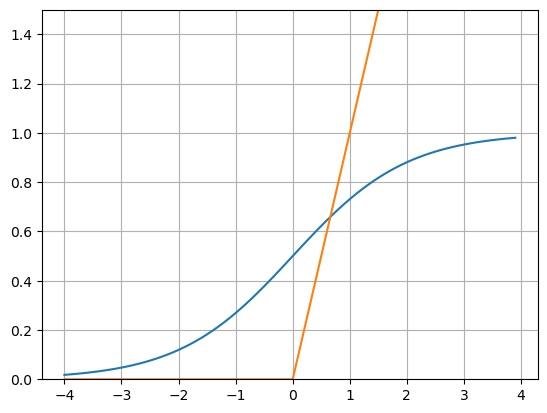

In [27]:
x = np.arange(-4,4,0.1)
rel = tf.nn.relu(x)

plt.plot(x,sig.numpy())
plt.plot(x,rel.numpy()) 
ax = plt.gca()
ax.set_ylim(0,1.5)
plt.grid('on')

Let us replace the activation with **ReLU**.

In [28]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(40, activation="relu"),
    tf.keras.layers.Dense(40, activation="relu"),
    tf.keras.layers.Dense(40, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

oh_y_train = tf.one_hot(y_train, 10)

model.fit(X_train, oh_y_train.numpy(), epochs=750, batch_size = 32)

Epoch 1/750
 7/57 [==>...........................] - ETA: 0s - loss: 2.3786 - accuracy: 0.0536 

2022-08-25 18:24:58.511643: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


57/57 [==============================] - 1s 8ms/step - loss: 2.3231 - accuracy: 0.1430
Epoch 2/750
57/57 [==============================] - 0s 7ms/step - loss: 2.2696 - accuracy: 0.1809
Epoch 3/750
57/57 [==============================] - 0s 8ms/step - loss: 2.2266 - accuracy: 0.2499
Epoch 4/750
57/57 [==============================] - 0s 7ms/step - loss: 2.1770 - accuracy: 0.3456
Epoch 5/750
57/57 [==============================] - 0s 8ms/step - loss: 2.1138 - accuracy: 0.3856
Epoch 6/750
57/57 [==============================] - 0s 8ms/step - loss: 2.0291 - accuracy: 0.4073
Epoch 7/750
57/57 [==============================] - 0s 8ms/step - loss: 1.9140 - accuracy: 0.4502
Epoch 8/750
57/57 [==============================] - 0s 8ms/step - loss: 1.7706 - accuracy: 0.5092
Epoch 9/750
57/57 [==============================] - 0s 8ms/step - loss: 1.5951 - accuracy: 0.5932
Epoch 10/750
57/57 [==============================] - 0s 7ms/step - loss: 1.3981 - accuracy: 0.6878
Epoch 11/750
57/57 [=

57/57 [==============================] - 0s 7ms/step - loss: 0.0528 - accuracy: 0.9905
Epoch 84/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0502 - accuracy: 0.9894
Epoch 85/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0504 - accuracy: 0.9900
Epoch 86/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0503 - accuracy: 0.9905
Epoch 87/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0487 - accuracy: 0.9905
Epoch 88/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0470 - accuracy: 0.9911
Epoch 89/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0473 - accuracy: 0.9933
Epoch 90/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0451 - accuracy: 0.9922
Epoch 91/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0527 - accuracy: 0.9894
Epoch 92/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0434 - accuracy: 0.9922
Epoch 93/750


57/57 [==============================] - 0s 7ms/step - loss: 0.0116 - accuracy: 1.0000
Epoch 165/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0119 - accuracy: 0.9994
Epoch 166/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0128 - accuracy: 0.9989
Epoch 167/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0115 - accuracy: 0.9989
Epoch 168/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0111 - accuracy: 0.9989
Epoch 169/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0110 - accuracy: 0.9994
Epoch 170/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0113 - accuracy: 0.9989
Epoch 171/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0108 - accuracy: 0.9989
Epoch 172/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0106 - accuracy: 0.9994
Epoch 173/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0105 - accuracy: 0.9989
Epoc

57/57 [==============================] - 0s 7ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 246/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 247/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 248/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 249/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 250/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 251/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 252/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 253/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 254/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0041 - accuracy: 1.0000
Epoc

57/57 [==============================] - 0s 7ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 327/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 328/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 329/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 330/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 331/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 332/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 333/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 334/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 335/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0023 - accuracy: 1.0000
Epoc

57/57 [==============================] - 0s 7ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 408/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 409/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 410/750
57/57 [==============================] - 0s 8ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 411/750
57/57 [==============================] - 0s 8ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 412/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 413/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 414/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 415/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 416/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0015 - accuracy: 1.0000
Epoc

57/57 [==============================] - 0s 7ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 489/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 490/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 491/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 492/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 493/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 494/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 495/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 496/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 497/750
57/57 [==============================] - 0s 7ms/step - loss: 0.0011 - accuracy: 1.0000
Epoc

Epoch 568/750
57/57 [==============================] - 0s 7ms/step - loss: 9.0310e-04 - accuracy: 1.0000
Epoch 569/750
57/57 [==============================] - 0s 7ms/step - loss: 8.9800e-04 - accuracy: 1.0000
Epoch 570/750
57/57 [==============================] - 0s 7ms/step - loss: 8.9201e-04 - accuracy: 1.0000
Epoch 571/750
57/57 [==============================] - 0s 8ms/step - loss: 8.9544e-04 - accuracy: 1.0000
Epoch 572/750
57/57 [==============================] - 0s 7ms/step - loss: 9.0086e-04 - accuracy: 1.0000
Epoch 573/750
57/57 [==============================] - 0s 7ms/step - loss: 8.9217e-04 - accuracy: 1.0000
Epoch 574/750
57/57 [==============================] - 0s 7ms/step - loss: 8.8419e-04 - accuracy: 1.0000
Epoch 575/750
57/57 [==============================] - 0s 7ms/step - loss: 8.8745e-04 - accuracy: 1.0000
Epoch 576/750
57/57 [==============================] - 0s 8ms/step - loss: 8.8236e-04 - accuracy: 1.0000
Epoch 577/750
57/57 [==============================] - 

57/57 [==============================] - 0s 8ms/step - loss: 7.3159e-04 - accuracy: 1.0000
Epoch 647/750
57/57 [==============================] - 0s 7ms/step - loss: 7.2712e-04 - accuracy: 1.0000
Epoch 648/750
57/57 [==============================] - 0s 7ms/step - loss: 7.2555e-04 - accuracy: 1.0000
Epoch 649/750
57/57 [==============================] - 0s 7ms/step - loss: 7.2482e-04 - accuracy: 1.0000
Epoch 650/750
57/57 [==============================] - 0s 7ms/step - loss: 7.2427e-04 - accuracy: 1.0000
Epoch 651/750
57/57 [==============================] - 0s 7ms/step - loss: 7.2111e-04 - accuracy: 1.0000
Epoch 652/750
57/57 [==============================] - 0s 7ms/step - loss: 7.2108e-04 - accuracy: 1.0000
Epoch 653/750
57/57 [==============================] - 0s 7ms/step - loss: 7.1445e-04 - accuracy: 1.0000
Epoch 654/750
57/57 [==============================] - 0s 7ms/step - loss: 7.1876e-04 - accuracy: 1.0000
Epoch 655/750
57/57 [==============================] - 0s 7ms/step - 

57/57 [==============================] - 0s 7ms/step - loss: 6.0801e-04 - accuracy: 1.0000
Epoch 725/750
57/57 [==============================] - 0s 7ms/step - loss: 6.0776e-04 - accuracy: 1.0000
Epoch 726/750
57/57 [==============================] - 0s 7ms/step - loss: 6.0653e-04 - accuracy: 1.0000
Epoch 727/750
57/57 [==============================] - 0s 7ms/step - loss: 6.0392e-04 - accuracy: 1.0000
Epoch 728/750
57/57 [==============================] - 0s 7ms/step - loss: 6.0311e-04 - accuracy: 1.0000
Epoch 729/750
57/57 [==============================] - 0s 7ms/step - loss: 6.0029e-04 - accuracy: 1.0000
Epoch 730/750
57/57 [==============================] - 0s 8ms/step - loss: 6.0022e-04 - accuracy: 1.0000
Epoch 731/750
57/57 [==============================] - 0s 7ms/step - loss: 5.9875e-04 - accuracy: 1.0000
Epoch 732/750
57/57 [==============================] - 0s 7ms/step - loss: 5.9556e-04 - accuracy: 1.0000
Epoch 733/750
57/57 [==============================] - 0s 7ms/step - 

2/2 [==============================] - 0s 10ms/step


2022-08-25 18:30:14.533907: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


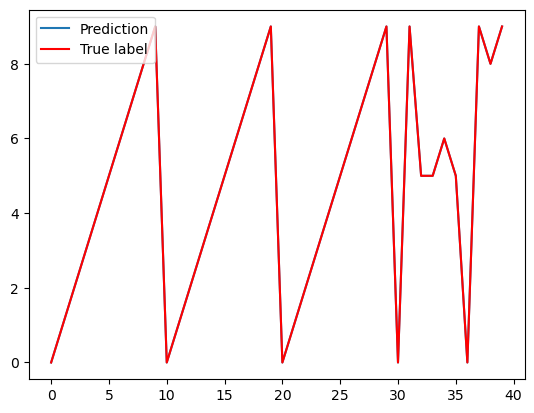

In [29]:
plt.plot(np.argmax(model.predict(X_train[0:40,:]),axis=1),label = 'Prediction')
plt.plot(y_train[0:40],color='r',label='True label')
plt.legend()

In [30]:
model.evaluate(X_train,  oh_y_train.numpy(), verbose=2)

2022-08-25 18:30:14.706159: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


57/57 - 0s - loss: 5.6258e-04 - accuracy: 1.0000 - 394ms/epoch - 7ms/step


[0.0005625787889584899, 1.0]



<div class = "alert alert-info" style = "border-radius:10px;border-width:3px"> 
<b>TAKE HOME IDEA:</b>    

There are different non-linear activations that can be used to address the challenges of dead neurons and vanishing gradients, such as ReLU, SeLU, Leaky ReLU, etc. These units are important because they allow the signal to flow forward and the gradient to flow backwards.

</div>



### PROBLEM 2: Internal covariate shift

and we are very HAPPY and try even more deep models!!!!!

In [31]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(40, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

oh_y_train = tf.one_hot(y_train, 10)

model.fit(X_train, oh_y_train.numpy(), epochs=750, batch_size = 32)


Epoch 1/750


2022-08-25 18:30:15.653559: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


57/57 [==============================] - 2s 16ms/step - loss: 2.3027 - accuracy: 0.0857
Epoch 2/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3027 - accuracy: 0.0924
Epoch 3/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3027 - accuracy: 0.0935
Epoch 4/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3027 - accuracy: 0.0952
Epoch 5/750
57/57 [==============================] - 1s 14ms/step - loss: 2.3027 - accuracy: 0.0946
Epoch 6/750
57/57 [==============================] - 1s 14ms/step - loss: 2.3027 - accuracy: 0.0991
Epoch 7/750
57/57 [==============================] - 1s 14ms/step - loss: 2.3027 - accuracy: 0.0907
Epoch 8/750
57/57 [==============================] - 1s 15ms/step - loss: 2.3027 - accuracy: 0.0952
Epoch 9/750
57/57 [==============================] - 1s 15ms/step - loss: 2.3027 - accuracy: 0.0863
Epoch 10/750
57/57 [==============================] - 1s 14ms/step - loss: 2.3027 - accuracy: 0.0879
Epoch 11/75

57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 83/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 84/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1002
Epoch 85/750
57/57 [==============================] - 1s 14ms/step - loss: 2.3026 - accuracy: 0.0979
Epoch 86/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 87/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.0996
Epoch 88/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.0963
Epoch 89/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 90/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.0957
Epoch 91/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.0996
Epo

57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.0974
Epoch 163/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.0952
Epoch 164/750
57/57 [==============================] - 1s 14ms/step - loss: 2.3026 - accuracy: 0.0985
Epoch 165/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.0996
Epoch 166/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.0918
Epoch 167/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 168/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.0974
Epoch 169/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.0946
Epoch 170/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.0952
Epoch 171/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0

57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 243/750
57/57 [==============================] - 1s 14ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 244/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 245/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 246/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 247/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 248/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 249/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 250/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 251/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0

57/57 [==============================] - 1s 14ms/step - loss: 2.3026 - accuracy: 0.0991
Epoch 323/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.0968
Epoch 324/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 325/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.0985
Epoch 326/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 327/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 328/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 329/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 330/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 331/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0

57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 403/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 404/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 405/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 406/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 407/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 408/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 409/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.0963
Epoch 410/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 411/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0

57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.0957
Epoch 483/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.0952
Epoch 484/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 485/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 486/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 487/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 488/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 489/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 490/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 491/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0

57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 563/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.0979
Epoch 564/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 565/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 566/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1007
Epoch 567/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 568/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 569/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1007
Epoch 570/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.0963
Epoch 571/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0

57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 643/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 644/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 645/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 646/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 647/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 648/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 649/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 650/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 651/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0

57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 723/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 724/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 725/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.0968
Epoch 726/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.0991
Epoch 727/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 728/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 729/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1002
Epoch 730/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 731/750
57/57 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0

2/2 [==============================] - 0s 41ms/step


2022-08-25 18:39:46.735313: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


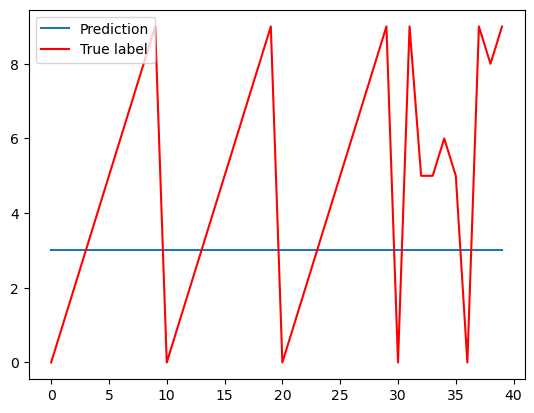

In [32]:
plt.plot(np.argmax(model.predict(X_train[0:40,:]),axis=1),label = 'Prediction')
plt.plot(y_train[0:40],color='r',label='True label')
plt.legend()

In [33]:
model.evaluate(X_train,  oh_y_train.numpy(), verbose=2)

2022-08-25 18:39:47.013635: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


57/57 - 1s - loss: 2.3025 - accuracy: 0.1018 - 612ms/epoch - 11ms/step


[2.302489995956421, 0.10183639824390411]

<div class = "alert alert-danger" style = "border-radius:10px;border-width:3px"><b> Question:</b> WHAT?????? WHY???? Didn't we just solved the problem?</div>



In [34]:
tf.keras.backend.clear_session()


inputs = tf.keras.Input(shape=(64,))
x = tf.keras.layers.Dense(100, activation="relu")(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(40, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

oh_y_train = tf.one_hot(y_train, 10)

model.fit(X_train, oh_y_train.numpy(), epochs=750, batch_size = 32)

Epoch 1/750


2022-08-25 18:39:48.464071: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


57/57 [==============================] - 3s 31ms/step - loss: 2.3027 - accuracy: 0.0896
Epoch 2/750
57/57 [==============================] - 1s 24ms/step - loss: 2.3028 - accuracy: 0.0957
Epoch 3/750
57/57 [==============================] - 1s 23ms/step - loss: 2.3027 - accuracy: 0.1024
Epoch 4/750
57/57 [==============================] - 1s 23ms/step - loss: 2.3027 - accuracy: 0.0996
Epoch 5/750
57/57 [==============================] - 1s 23ms/step - loss: 2.3027 - accuracy: 0.0996
Epoch 6/750
57/57 [==============================] - 1s 23ms/step - loss: 2.3027 - accuracy: 0.1013
Epoch 7/750
57/57 [==============================] - 1s 23ms/step - loss: 2.3027 - accuracy: 0.0996
Epoch 8/750
57/57 [==============================] - 1s 24ms/step - loss: 2.3027 - accuracy: 0.0968
Epoch 9/750
57/57 [==============================] - 1s 23ms/step - loss: 2.3026 - accuracy: 0.0991
Epoch 10/750
57/57 [==============================] - 1s 23ms/step - loss: 2.3027 - accuracy: 0.0952
Epoch 11/75

57/57 [==============================] - 1s 24ms/step - loss: 2.3022 - accuracy: 0.1029
Epoch 83/750
57/57 [==============================] - 1s 23ms/step - loss: 2.3021 - accuracy: 0.1002
Epoch 84/750
57/57 [==============================] - 1s 24ms/step - loss: 2.3021 - accuracy: 0.1180
Epoch 85/750
57/57 [==============================] - 1s 24ms/step - loss: 2.3021 - accuracy: 0.1091
Epoch 86/750
57/57 [==============================] - 1s 24ms/step - loss: 2.3020 - accuracy: 0.1102
Epoch 87/750
57/57 [==============================] - 1s 24ms/step - loss: 2.3019 - accuracy: 0.1191
Epoch 88/750
57/57 [==============================] - 1s 24ms/step - loss: 2.3019 - accuracy: 0.1185
Epoch 89/750
57/57 [==============================] - 1s 23ms/step - loss: 2.3019 - accuracy: 0.1102
Epoch 90/750
57/57 [==============================] - 1s 24ms/step - loss: 2.3018 - accuracy: 0.1063
Epoch 91/750
57/57 [==============================] - 1s 24ms/step - loss: 2.3016 - accuracy: 0.1013
Epo

57/57 [==============================] - 1s 24ms/step - loss: 1.5336 - accuracy: 0.3984
Epoch 163/750
57/57 [==============================] - 1s 24ms/step - loss: 1.4924 - accuracy: 0.3957
Epoch 164/750
57/57 [==============================] - 1s 24ms/step - loss: 1.3936 - accuracy: 0.4313
Epoch 165/750
57/57 [==============================] - 1s 24ms/step - loss: 1.3960 - accuracy: 0.4418
Epoch 166/750
57/57 [==============================] - 1s 23ms/step - loss: 1.3547 - accuracy: 0.4463
Epoch 167/750
57/57 [==============================] - 1s 24ms/step - loss: 1.2925 - accuracy: 0.4535
Epoch 168/750
57/57 [==============================] - 1s 23ms/step - loss: 1.3929 - accuracy: 0.4357
Epoch 169/750
57/57 [==============================] - 1s 23ms/step - loss: 1.2725 - accuracy: 0.4814
Epoch 170/750
57/57 [==============================] - 1s 23ms/step - loss: 1.3450 - accuracy: 0.4407
Epoch 171/750
57/57 [==============================] - 1s 23ms/step - loss: 1.2666 - accuracy: 0

57/57 [==============================] - 1s 24ms/step - loss: 0.7992 - accuracy: 0.7301
Epoch 243/750
57/57 [==============================] - 1s 23ms/step - loss: 0.8837 - accuracy: 0.7334
Epoch 244/750
57/57 [==============================] - 1s 24ms/step - loss: 0.8305 - accuracy: 0.7435
Epoch 245/750
57/57 [==============================] - 1s 24ms/step - loss: 0.7540 - accuracy: 0.7685
Epoch 246/750
57/57 [==============================] - 1s 24ms/step - loss: 0.6279 - accuracy: 0.8197
Epoch 247/750
57/57 [==============================] - 1s 23ms/step - loss: 0.8153 - accuracy: 0.7513
Epoch 248/750
57/57 [==============================] - 1s 23ms/step - loss: 0.7416 - accuracy: 0.8030
Epoch 249/750
57/57 [==============================] - 1s 23ms/step - loss: 1.1548 - accuracy: 0.5838
Epoch 250/750
57/57 [==============================] - 1s 23ms/step - loss: 0.9688 - accuracy: 0.6739
Epoch 251/750
57/57 [==============================] - 1s 23ms/step - loss: 0.8612 - accuracy: 0

57/57 [==============================] - 1s 25ms/step - loss: 0.5119 - accuracy: 0.8564
Epoch 323/750
57/57 [==============================] - 1s 24ms/step - loss: 0.5101 - accuracy: 0.8804
Epoch 324/750
57/57 [==============================] - 1s 24ms/step - loss: 0.3462 - accuracy: 0.9210
Epoch 325/750
57/57 [==============================] - 1s 24ms/step - loss: 0.4548 - accuracy: 0.8965
Epoch 326/750
57/57 [==============================] - 1s 25ms/step - loss: 0.4623 - accuracy: 0.8870
Epoch 327/750
57/57 [==============================] - 1s 24ms/step - loss: 0.4827 - accuracy: 0.8887
Epoch 328/750
57/57 [==============================] - 1s 24ms/step - loss: 0.5319 - accuracy: 0.8548
Epoch 329/750
57/57 [==============================] - 1s 24ms/step - loss: 0.4953 - accuracy: 0.8703
Epoch 330/750
57/57 [==============================] - 1s 23ms/step - loss: 0.4441 - accuracy: 0.8898
Epoch 331/750
57/57 [==============================] - 1s 23ms/step - loss: 0.4564 - accuracy: 0

57/57 [==============================] - 1s 23ms/step - loss: 0.4728 - accuracy: 0.9087
Epoch 403/750
57/57 [==============================] - 1s 23ms/step - loss: 0.3797 - accuracy: 0.9121
Epoch 404/750
57/57 [==============================] - 1s 23ms/step - loss: 0.3258 - accuracy: 0.9226
Epoch 405/750
57/57 [==============================] - 1s 23ms/step - loss: 0.3035 - accuracy: 0.9299
Epoch 406/750
57/57 [==============================] - 1s 23ms/step - loss: 0.2743 - accuracy: 0.9388
Epoch 407/750
57/57 [==============================] - 1s 24ms/step - loss: 0.2178 - accuracy: 0.9494
Epoch 408/750
57/57 [==============================] - 1s 24ms/step - loss: 0.2369 - accuracy: 0.9449
Epoch 409/750
57/57 [==============================] - 1s 24ms/step - loss: 0.2805 - accuracy: 0.9399
Epoch 410/750
57/57 [==============================] - 1s 24ms/step - loss: 0.2843 - accuracy: 0.9399
Epoch 411/750
57/57 [==============================] - 1s 24ms/step - loss: 0.2869 - accuracy: 0

57/57 [==============================] - 1s 23ms/step - loss: 0.2286 - accuracy: 0.9444
Epoch 483/750
57/57 [==============================] - 1s 23ms/step - loss: 0.2086 - accuracy: 0.9510
Epoch 484/750
57/57 [==============================] - 1s 24ms/step - loss: 0.2053 - accuracy: 0.9494
Epoch 485/750
57/57 [==============================] - 1s 23ms/step - loss: 0.2067 - accuracy: 0.9533
Epoch 486/750
57/57 [==============================] - 1s 24ms/step - loss: 0.2085 - accuracy: 0.9499
Epoch 487/750
57/57 [==============================] - 1s 24ms/step - loss: 0.2661 - accuracy: 0.9366
Epoch 488/750
57/57 [==============================] - 1s 24ms/step - loss: 0.2187 - accuracy: 0.9505
Epoch 489/750
57/57 [==============================] - 1s 23ms/step - loss: 0.2885 - accuracy: 0.9354
Epoch 490/750
57/57 [==============================] - 1s 23ms/step - loss: 0.1862 - accuracy: 0.9555
Epoch 491/750
57/57 [==============================] - 1s 24ms/step - loss: 0.2531 - accuracy: 0

57/57 [==============================] - 1s 24ms/step - loss: 0.1420 - accuracy: 0.9677
Epoch 563/750
57/57 [==============================] - 1s 24ms/step - loss: 0.6314 - accuracy: 0.8358
Epoch 564/750
57/57 [==============================] - 1s 23ms/step - loss: 0.6601 - accuracy: 0.7952
Epoch 565/750
57/57 [==============================] - 1s 23ms/step - loss: 0.5226 - accuracy: 0.8575
Epoch 566/750
57/57 [==============================] - 1s 24ms/step - loss: 0.4625 - accuracy: 0.8687
Epoch 567/750
57/57 [==============================] - 1s 24ms/step - loss: 0.3493 - accuracy: 0.9043
Epoch 568/750
57/57 [==============================] - 1s 23ms/step - loss: 0.4433 - accuracy: 0.8687
Epoch 569/750
57/57 [==============================] - 1s 24ms/step - loss: 0.4891 - accuracy: 0.8503
Epoch 570/750
57/57 [==============================] - 1s 23ms/step - loss: 0.3500 - accuracy: 0.8870
Epoch 571/750
57/57 [==============================] - 1s 23ms/step - loss: 0.2878 - accuracy: 0

57/57 [==============================] - 1s 24ms/step - loss: 0.1930 - accuracy: 0.9572
Epoch 643/750
57/57 [==============================] - 1s 24ms/step - loss: 0.2129 - accuracy: 0.9516
Epoch 644/750
57/57 [==============================] - 1s 23ms/step - loss: 0.1954 - accuracy: 0.9566
Epoch 645/750
57/57 [==============================] - 1s 23ms/step - loss: 0.2566 - accuracy: 0.9371
Epoch 646/750
57/57 [==============================] - 1s 24ms/step - loss: 0.2477 - accuracy: 0.9432
Epoch 647/750
57/57 [==============================] - 1s 24ms/step - loss: 0.2028 - accuracy: 0.9555
Epoch 648/750
57/57 [==============================] - 1s 23ms/step - loss: 0.2375 - accuracy: 0.9377
Epoch 649/750
57/57 [==============================] - 1s 23ms/step - loss: 0.1641 - accuracy: 0.9599
Epoch 650/750
57/57 [==============================] - 1s 23ms/step - loss: 0.2367 - accuracy: 0.9393
Epoch 651/750
57/57 [==============================] - 1s 23ms/step - loss: 0.1558 - accuracy: 0

57/57 [==============================] - 1s 23ms/step - loss: 0.1983 - accuracy: 0.9555
Epoch 723/750
57/57 [==============================] - 1s 23ms/step - loss: 0.1818 - accuracy: 0.9566
Epoch 724/750
57/57 [==============================] - 1s 23ms/step - loss: 0.1719 - accuracy: 0.9583
Epoch 725/750
57/57 [==============================] - 1s 24ms/step - loss: 0.1850 - accuracy: 0.9538
Epoch 726/750
57/57 [==============================] - 1s 23ms/step - loss: 0.2144 - accuracy: 0.9449
Epoch 727/750
57/57 [==============================] - 1s 23ms/step - loss: 0.1944 - accuracy: 0.9588
Epoch 728/750
57/57 [==============================] - 1s 23ms/step - loss: 0.2655 - accuracy: 0.9482
Epoch 729/750
57/57 [==============================] - 1s 23ms/step - loss: 0.1570 - accuracy: 0.9638
Epoch 730/750
57/57 [==============================] - 1s 24ms/step - loss: 0.2030 - accuracy: 0.9560
Epoch 731/750
57/57 [==============================] - 1s 24ms/step - loss: 0.1554 - accuracy: 0

1/2 [==============>...............] - ETA: 0s

2022-08-25 18:56:41.036731: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 84ms/step


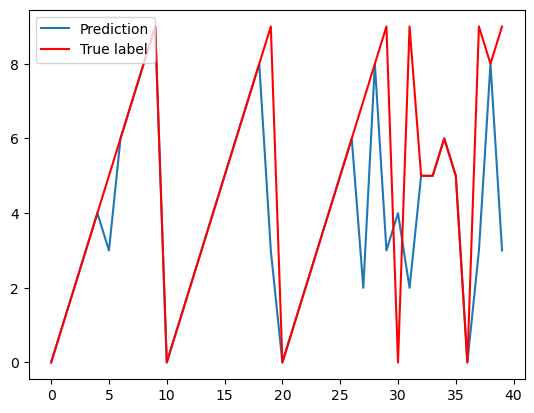

In [35]:
plt.plot(np.argmax(model.predict(X_train[0:40,:]),axis=1),label = 'Prediction')
plt.plot(y_train[0:40],color='r',label='True label')
plt.legend()

In [36]:
model.evaluate(X_train,  oh_y_train.numpy(), verbose=2)

2022-08-25 18:56:41.464168: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


57/57 - 1s - loss: 0.2747 - accuracy: 0.9382 - 881ms/epoch - 15ms/step


[0.27471935749053955, 0.9382303953170776]

In [37]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64)]              0         
                                                                 
 dense (Dense)               (None, 100)               6500      
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 40)                4040      
                                                                 
 batch_normalization_1 (Batc  (None, 40)               160       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 20)                820   

In [38]:
from tensorflow.keras import backend as K

# with a Sequential model
inp = model.input  
get_1st_output = K.function(inp,[model.layers[1].output])
layer_output = get_1st_output(X_train)

(array([  4.,   9.,  19.,  43.,  53., 102., 136., 162., 155., 171., 155.,
        164., 125., 108., 111.,  71.,  56.,  44.,  25.,  27.,  14.,  10.,
         14.,  11.,   6.,   0.,   0.,   1.,   0.,   1.]),
 array([2.29875685, 2.52231977, 2.7458827 , 2.96944562, 3.19300855,
        3.41657148, 3.6401344 , 3.86369733, 4.08726025, 4.31082318,
        4.53438611, 4.75794903, 4.98151196, 5.20507488, 5.42863781,
        5.65220074, 5.87576366, 6.09932659, 6.32288951, 6.54645244,
        6.77001537, 6.99357829, 7.21714122, 7.44070414, 7.66426707,
        7.88783   , 8.11139292, 8.33495585, 8.55851877, 8.7820817 ,
        9.00564463]),
 <BarContainer object of 30 artists>)

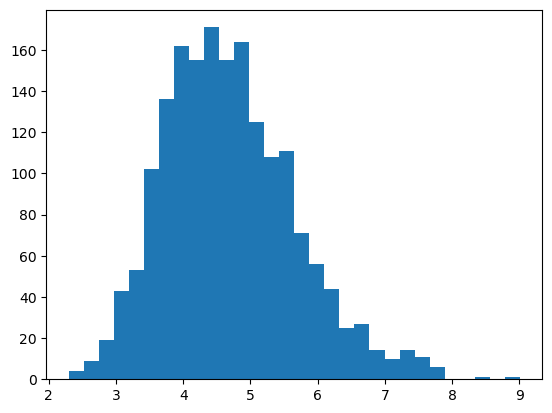

In [39]:
m = np.mean(X_train,axis=0)
plt.hist(np.sum(np.power(X_train-np.tile(m,(X_train.shape[0],1)),2),axis=1),bins=30)

In [40]:
layer_output

[array([[0.        , 1.7887611 , 2.5257256 , ..., 0.5309446 , 1.751518  ,
         2.640271  ],
        [0.        , 0.95692927, 1.1578046 , ..., 2.486861  , 4.062178  ,
         2.2656353 ],
        [0.        , 1.1670153 , 1.2010942 , ..., 1.2745318 , 4.032453  ,
         1.5814555 ],
        ...,
        [0.        , 1.3495152 , 1.575973  , ..., 1.8458784 , 3.6829875 ,
         1.6833352 ],
        [0.        , 1.5472707 , 2.7525535 , ..., 0.7973112 , 3.5690951 ,
         2.6144743 ],
        [0.        , 1.3757193 , 1.9929285 , ..., 1.3334357 , 4.0929565 ,
         2.065422  ]], dtype=float32)]

(array([  6.,  58., 142., 214., 267., 272., 241., 155., 131.,  87.,  64.,
         40.,  21.,  33.,  19.,  13.,  14.,   6.,   8.,   2.,   0.,   0.,
          1.,   1.,   0.,   0.,   0.,   1.,   0.,   1.]),
 array([ 5.4774303,  8.204978 , 10.932525 , 13.660072 , 16.387619 ,
        19.115166 , 21.842714 , 24.570261 , 27.297808 , 30.025356 ,
        32.752903 , 35.48045  , 38.207996 , 40.935543 , 43.663094 ,
        46.39064  , 49.118187 , 51.845734 , 54.57328  , 57.300827 ,
        60.028374 , 62.755924 , 65.48347  , 68.21101  , 70.93857  ,
        73.666115 , 76.39366  , 79.12121  , 81.848755 , 84.5763   ,
        87.30385  ], dtype=float32),
 <BarContainer object of 30 artists>)

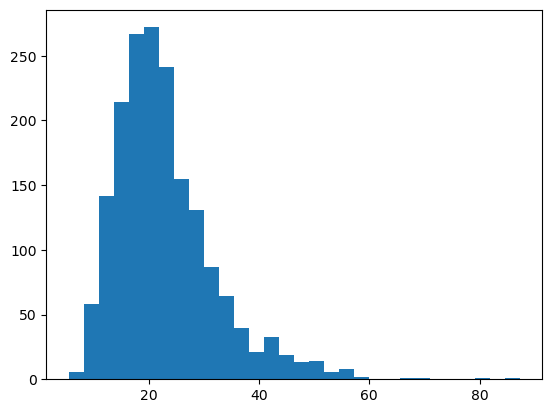

In [41]:
m = np.mean(layer_output[0],axis=0)
plt.hist(np.sum(np.power(layer_output[0]-np.tile(m,(X_train.shape[0],1)),2),axis=1),bins=30)

In [42]:
from tensorflow.keras import backend as K

# with a Sequential model
inp = model.input  
get_batch_output = K.function(inp,[model.layers[2].output])
batch_output = get_batch_output(X_train)

(array([  8.,  57., 122., 208., 277., 266., 236., 186., 126.,  90.,  64.,
         49.,  41.,  15.,  20.,   9.,  11.,   4.,   1.,   0.,   0.,   2.,
          0.,   1.,   1.,   0.,   0.,   1.,   0.,   2.]),
 array([  9.419694,  13.999665,  18.579636,  23.159607,  27.739578,
         32.31955 ,  36.89952 ,  41.479492,  46.059464,  50.639435,
         55.219406,  59.799377,  64.37935 ,  68.95932 ,  73.53929 ,
         78.11926 ,  82.699234,  87.279205,  91.85918 ,  96.43915 ,
        101.01912 , 105.59909 , 110.17906 , 114.75903 , 119.339005,
        123.918976, 128.49895 , 133.07892 , 137.65889 , 142.23886 ,
        146.81883 ], dtype=float32),
 <BarContainer object of 30 artists>)

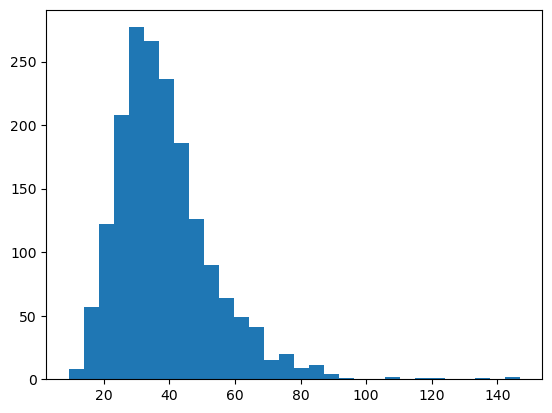

In [43]:
m = np.mean(batch_output[0],axis=0)
plt.hist(np.sum(np.power(batch_output[0]-np.tile(m,(X_train.shape[0],1)),2),axis=1),bins=30)

Sooooo... if we reset statistics can ```sigmoid``` work? **YES!!!!**

Let's check it...

In [44]:
import tensorflow as tf
tf.keras.backend.clear_session()


inputs = tf.keras.Input(shape=(64,))
x = tf.keras.layers.Dense(100, activation="sigmoid")(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(40, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

oh_y_train = tf.one_hot(y_train, 10)

model.fit(X_train, oh_y_train.numpy(), epochs=750, batch_size = 32)

Epoch 1/750


2022-08-25 18:56:44.720994: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


57/57 [==============================] - 7s 63ms/step - loss: 2.2691 - accuracy: 0.1219
Epoch 2/750
57/57 [==============================] - 3s 50ms/step - loss: 2.0619 - accuracy: 0.3200
Epoch 3/750
57/57 [==============================] - 3s 48ms/step - loss: 1.9496 - accuracy: 0.4775
Epoch 4/750
57/57 [==============================] - 3s 48ms/step - loss: 1.8663 - accuracy: 0.5376
Epoch 5/750
57/57 [==============================] - 3s 50ms/step - loss: 1.7918 - accuracy: 0.5698
Epoch 6/750
57/57 [==============================] - 3s 49ms/step - loss: 1.7149 - accuracy: 0.6060
Epoch 7/750
57/57 [==============================] - 3s 48ms/step - loss: 1.6533 - accuracy: 0.6516
Epoch 8/750
57/57 [==============================] - 3s 49ms/step - loss: 1.6005 - accuracy: 0.6767
Epoch 9/750
57/57 [==============================] - 3s 49ms/step - loss: 1.5161 - accuracy: 0.7307
Epoch 10/750
57/57 [==============================] - 3s 49ms/step - loss: 1.4667 - accuracy: 0.7496
Epoch 11/75

57/57 [==============================] - 3s 46ms/step - loss: 0.3666 - accuracy: 0.9154
Epoch 83/750
57/57 [==============================] - 3s 46ms/step - loss: 0.3218 - accuracy: 0.9282
Epoch 84/750
57/57 [==============================] - 3s 46ms/step - loss: 0.3098 - accuracy: 0.9354
Epoch 85/750
57/57 [==============================] - 3s 46ms/step - loss: 0.6167 - accuracy: 0.8420
Epoch 86/750
57/57 [==============================] - 3s 46ms/step - loss: 0.4405 - accuracy: 0.8932
Epoch 87/750
57/57 [==============================] - 3s 46ms/step - loss: 0.6539 - accuracy: 0.8136
Epoch 88/750
57/57 [==============================] - 3s 46ms/step - loss: 0.4368 - accuracy: 0.8843
Epoch 89/750
57/57 [==============================] - 3s 46ms/step - loss: 0.4029 - accuracy: 0.9054
Epoch 90/750
57/57 [==============================] - 3s 46ms/step - loss: 0.3885 - accuracy: 0.9032
Epoch 91/750
57/57 [==============================] - 3s 46ms/step - loss: 0.3839 - accuracy: 0.9054
Epo

57/57 [==============================] - 3s 47ms/step - loss: 0.2374 - accuracy: 0.9421
Epoch 163/750
57/57 [==============================] - 3s 47ms/step - loss: 0.2228 - accuracy: 0.9405
Epoch 164/750
57/57 [==============================] - 3s 47ms/step - loss: 0.1987 - accuracy: 0.9527
Epoch 165/750
57/57 [==============================] - 3s 47ms/step - loss: 0.7229 - accuracy: 0.7763
Epoch 166/750
57/57 [==============================] - 3s 47ms/step - loss: 0.4846 - accuracy: 0.8525
Epoch 167/750
57/57 [==============================] - 3s 47ms/step - loss: 0.4127 - accuracy: 0.8876
Epoch 168/750
57/57 [==============================] - 3s 47ms/step - loss: 0.4457 - accuracy: 0.8809
Epoch 169/750
57/57 [==============================] - 3s 47ms/step - loss: 0.3476 - accuracy: 0.9009
Epoch 170/750
57/57 [==============================] - 3s 47ms/step - loss: 0.3036 - accuracy: 0.9210
Epoch 171/750
57/57 [==============================] - 3s 47ms/step - loss: 0.2831 - accuracy: 0

57/57 [==============================] - 3s 48ms/step - loss: 0.1566 - accuracy: 0.9616
Epoch 243/750
57/57 [==============================] - 3s 47ms/step - loss: 0.1598 - accuracy: 0.9649
Epoch 244/750
57/57 [==============================] - 3s 47ms/step - loss: 0.3124 - accuracy: 0.9149
Epoch 245/750
57/57 [==============================] - 3s 47ms/step - loss: 0.1765 - accuracy: 0.9572
Epoch 246/750
57/57 [==============================] - 3s 47ms/step - loss: 0.2164 - accuracy: 0.9488
Epoch 247/750
57/57 [==============================] - 3s 47ms/step - loss: 0.1834 - accuracy: 0.9544
Epoch 248/750
57/57 [==============================] - 3s 47ms/step - loss: 0.1700 - accuracy: 0.9588
Epoch 249/750
57/57 [==============================] - 3s 47ms/step - loss: 0.1865 - accuracy: 0.9516
Epoch 250/750
57/57 [==============================] - 3s 47ms/step - loss: 0.1698 - accuracy: 0.9560
Epoch 251/750
57/57 [==============================] - 3s 48ms/step - loss: 0.1674 - accuracy: 0

57/57 [==============================] - 3s 48ms/step - loss: 0.1033 - accuracy: 0.9744
Epoch 323/750
57/57 [==============================] - 3s 47ms/step - loss: 0.0977 - accuracy: 0.9789
Epoch 324/750
57/57 [==============================] - 3s 47ms/step - loss: 0.1519 - accuracy: 0.9655
Epoch 325/750
57/57 [==============================] - 3s 47ms/step - loss: 0.1019 - accuracy: 0.9766
Epoch 326/750
57/57 [==============================] - 3s 47ms/step - loss: 0.0959 - accuracy: 0.9794
Epoch 327/750
57/57 [==============================] - 3s 47ms/step - loss: 0.1323 - accuracy: 0.9655
Epoch 328/750
57/57 [==============================] - 3s 47ms/step - loss: 0.0852 - accuracy: 0.9805
Epoch 329/750
57/57 [==============================] - 3s 47ms/step - loss: 0.1354 - accuracy: 0.9711
Epoch 330/750
57/57 [==============================] - 3s 47ms/step - loss: 0.1148 - accuracy: 0.9733
Epoch 331/750
57/57 [==============================] - 3s 47ms/step - loss: 0.2073 - accuracy: 0

57/57 [==============================] - 3s 46ms/step - loss: 0.0897 - accuracy: 0.9800
Epoch 403/750
57/57 [==============================] - 3s 46ms/step - loss: 0.0808 - accuracy: 0.9789
Epoch 404/750
57/57 [==============================] - 3s 46ms/step - loss: 0.0760 - accuracy: 0.9839
Epoch 405/750
57/57 [==============================] - 3s 47ms/step - loss: 0.0782 - accuracy: 0.9839
Epoch 406/750
57/57 [==============================] - 3s 47ms/step - loss: 0.0918 - accuracy: 0.9772
Epoch 407/750
57/57 [==============================] - 3s 48ms/step - loss: 0.0810 - accuracy: 0.9822
Epoch 408/750
57/57 [==============================] - 3s 48ms/step - loss: 0.0997 - accuracy: 0.9761
Epoch 409/750
57/57 [==============================] - 3s 48ms/step - loss: 0.0808 - accuracy: 0.9839
Epoch 410/750
57/57 [==============================] - 3s 48ms/step - loss: 0.0982 - accuracy: 0.9750
Epoch 411/750
57/57 [==============================] - 3s 48ms/step - loss: 0.1050 - accuracy: 0

57/57 [==============================] - 3s 46ms/step - loss: 0.0773 - accuracy: 0.9811
Epoch 483/750
57/57 [==============================] - 3s 46ms/step - loss: 0.0558 - accuracy: 0.9883
Epoch 484/750
57/57 [==============================] - 3s 46ms/step - loss: 0.0587 - accuracy: 0.9866
Epoch 485/750
57/57 [==============================] - 3s 46ms/step - loss: 0.0664 - accuracy: 0.9816
Epoch 486/750
57/57 [==============================] - 3s 46ms/step - loss: 0.0795 - accuracy: 0.9789
Epoch 487/750
57/57 [==============================] - 3s 46ms/step - loss: 0.0914 - accuracy: 0.9783
Epoch 488/750
57/57 [==============================] - 3s 46ms/step - loss: 0.0943 - accuracy: 0.9744
Epoch 489/750
57/57 [==============================] - 3s 46ms/step - loss: 0.1951 - accuracy: 0.9460
Epoch 490/750
57/57 [==============================] - 3s 46ms/step - loss: 0.1219 - accuracy: 0.9661
Epoch 491/750
57/57 [==============================] - 3s 46ms/step - loss: 0.1099 - accuracy: 0

57/57 [==============================] - 3s 46ms/step - loss: 0.1471 - accuracy: 0.9599
Epoch 563/750
57/57 [==============================] - 3s 46ms/step - loss: 0.1514 - accuracy: 0.9588
Epoch 564/750
57/57 [==============================] - 3s 46ms/step - loss: 0.1277 - accuracy: 0.9677
Epoch 565/750
57/57 [==============================] - 3s 46ms/step - loss: 0.1351 - accuracy: 0.9672
Epoch 566/750
57/57 [==============================] - 3s 46ms/step - loss: 0.1278 - accuracy: 0.9705
Epoch 567/750
57/57 [==============================] - 3s 46ms/step - loss: 0.1261 - accuracy: 0.9622
Epoch 568/750
57/57 [==============================] - 3s 46ms/step - loss: 0.1319 - accuracy: 0.9661
Epoch 569/750
57/57 [==============================] - 3s 46ms/step - loss: 0.1331 - accuracy: 0.9655
Epoch 570/750
57/57 [==============================] - 3s 46ms/step - loss: 0.1208 - accuracy: 0.9705
Epoch 571/750
57/57 [==============================] - 3s 46ms/step - loss: 0.1247 - accuracy: 0

57/57 [==============================] - 3s 46ms/step - loss: 0.0888 - accuracy: 0.9777
Epoch 643/750
57/57 [==============================] - 3s 46ms/step - loss: 0.1808 - accuracy: 0.9482
Epoch 644/750
57/57 [==============================] - 3s 46ms/step - loss: 0.0904 - accuracy: 0.9766
Epoch 645/750
57/57 [==============================] - 3s 47ms/step - loss: 0.1271 - accuracy: 0.9633
Epoch 646/750
57/57 [==============================] - 3s 47ms/step - loss: 0.1202 - accuracy: 0.9694
Epoch 647/750
57/57 [==============================] - 3s 47ms/step - loss: 0.0824 - accuracy: 0.9794
Epoch 648/750
57/57 [==============================] - 3s 46ms/step - loss: 0.8413 - accuracy: 0.7663
Epoch 649/750
57/57 [==============================] - 3s 46ms/step - loss: 0.3935 - accuracy: 0.8854
Epoch 650/750
57/57 [==============================] - 3s 46ms/step - loss: 0.2975 - accuracy: 0.9087
Epoch 651/750
57/57 [==============================] - 3s 46ms/step - loss: 0.2846 - accuracy: 0

57/57 [==============================] - 3s 47ms/step - loss: 0.0742 - accuracy: 0.9822
Epoch 723/750
57/57 [==============================] - 3s 47ms/step - loss: 0.0891 - accuracy: 0.9800
Epoch 724/750
57/57 [==============================] - 3s 48ms/step - loss: 0.0897 - accuracy: 0.9755
Epoch 725/750
57/57 [==============================] - 3s 49ms/step - loss: 0.2871 - accuracy: 0.9132
Epoch 726/750
57/57 [==============================] - 3s 48ms/step - loss: 0.1985 - accuracy: 0.9393
Epoch 727/750
57/57 [==============================] - 3s 48ms/step - loss: 0.1701 - accuracy: 0.9549
Epoch 728/750
57/57 [==============================] - 3s 48ms/step - loss: 0.2017 - accuracy: 0.9455
Epoch 729/750
57/57 [==============================] - 3s 48ms/step - loss: 0.1304 - accuracy: 0.9644
Epoch 730/750
57/57 [==============================] - 3s 47ms/step - loss: 0.1070 - accuracy: 0.9677
Epoch 731/750
57/57 [==============================] - 3s 46ms/step - loss: 0.1360 - accuracy: 0

2022-08-25 19:30:09.658503: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 121ms/step


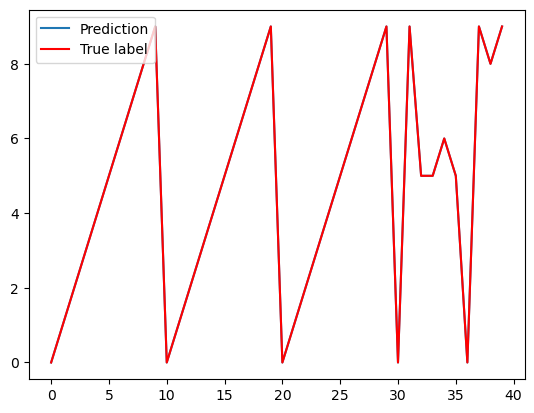

In [45]:
plt.plot(np.argmax(model.predict(X_train[0:40,:]),axis=1),label = 'Prediction')
plt.plot(y_train[0:40],color='r',label='True label')
plt.legend()

In [46]:
model.evaluate(X_train,  oh_y_train.numpy(), verbose=2)

2022-08-25 19:30:10.580386: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


57/57 - 2s - loss: 0.0314 - accuracy: 0.9989 - 2s/epoch - 35ms/step


[0.031358327716588974, 0.9988870620727539]

## Errrrr ... btw, all the process was wrong! Where is training and test????

In [47]:
from sklearn.datasets import load_digits
import numpy as np

from sklearn.model_selection import train_test_split

data=load_digits()
X = data.data/16.
y = data.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=42)

In [48]:
tf.keras.backend.clear_session()


inputs = tf.keras.Input(shape=(64,))
x = tf.keras.layers.Dense(100, activation="relu")(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(40, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

oh_y_train = tf.one_hot(y_train, 10)

model.fit(X_train, oh_y_train.numpy(), epochs=750, batch_size = 32)

Epoch 1/750


2022-08-25 19:30:17.729899: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


29/29 [==============================] - 2s 49ms/step - loss: 2.3027 - accuracy: 0.0958
Epoch 2/750
29/29 [==============================] - 1s 21ms/step - loss: 2.3026 - accuracy: 0.1024
Epoch 3/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3025 - accuracy: 0.1024
Epoch 4/750
29/29 [==============================] - 1s 20ms/step - loss: 2.3025 - accuracy: 0.1024
Epoch 5/750
29/29 [==============================] - 1s 22ms/step - loss: 2.3024 - accuracy: 0.1024
Epoch 6/750
29/29 [==============================] - 1s 20ms/step - loss: 2.3023 - accuracy: 0.0947
Epoch 7/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3023 - accuracy: 0.1024
Epoch 8/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3022 - accuracy: 0.0991
Epoch 9/750
29/29 [==============================] - 1s 20ms/step - loss: 2.3021 - accuracy: 0.1069
Epoch 10/750
29/29 [==============================] - 1s 20ms/step - loss: 2.3021 - accuracy: 0.0924
Epoch 11/75

29/29 [==============================] - 1s 20ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 83/750
29/29 [==============================] - 1s 20ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 84/750
29/29 [==============================] - 1s 20ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 85/750
29/29 [==============================] - 1s 20ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 86/750
29/29 [==============================] - 1s 21ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 87/750
29/29 [==============================] - 1s 20ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 88/750
29/29 [==============================] - 1s 20ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 89/750
29/29 [==============================] - 1s 20ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 90/750
29/29 [==============================] - 1s 20ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 91/750
29/29 [==============================] - 1s 20ms/step - loss: 2.3017 - accuracy: 0.1069
Epo

29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 163/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 164/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 165/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 166/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 167/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 168/750
29/29 [==============================] - 1s 20ms/step - loss: 2.3018 - accuracy: 0.1069
Epoch 169/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 170/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 171/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0

29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 243/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 244/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 245/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 246/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 247/750
29/29 [==============================] - 1s 20ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 248/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 249/750
29/29 [==============================] - 1s 20ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 250/750
29/29 [==============================] - 1s 20ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 251/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0

29/29 [==============================] - 1s 20ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 323/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 324/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 325/750
29/29 [==============================] - 1s 20ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 326/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 327/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 328/750
29/29 [==============================] - 1s 20ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 329/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 330/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 331/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0

29/29 [==============================] - 1s 20ms/step - loss: 2.3018 - accuracy: 0.1069
Epoch 403/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3018 - accuracy: 0.1069
Epoch 404/750
29/29 [==============================] - 1s 20ms/step - loss: 2.3018 - accuracy: 0.1069
Epoch 405/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3018 - accuracy: 0.1069
Epoch 406/750
29/29 [==============================] - 1s 20ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 407/750
29/29 [==============================] - 1s 20ms/step - loss: 2.3018 - accuracy: 0.1069
Epoch 408/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 409/750
29/29 [==============================] - 1s 20ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 410/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 411/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0

29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 483/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 484/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 485/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 486/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 487/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 488/750
29/29 [==============================] - 1s 20ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 489/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 490/750
29/29 [==============================] - 1s 20ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 491/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0

29/29 [==============================] - 1s 19ms/step - loss: 2.3018 - accuracy: 0.1069
Epoch 563/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 564/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 565/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 566/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 567/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 568/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 569/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 570/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 571/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0

29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 643/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 644/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 645/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 646/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 647/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 648/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 649/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 650/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 651/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0

29/29 [==============================] - 1s 20ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 723/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 724/750
29/29 [==============================] - 1s 20ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 725/750
29/29 [==============================] - 1s 20ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 726/750
29/29 [==============================] - 1s 20ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 727/750
29/29 [==============================] - 1s 20ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 728/750
29/29 [==============================] - 1s 20ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 729/750
29/29 [==============================] - 1s 20ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 730/750
29/29 [==============================] - 1s 20ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 731/750
29/29 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0

1/2 [==============>...............] - ETA: 0s

2022-08-25 19:37:24.299270: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 86ms/step


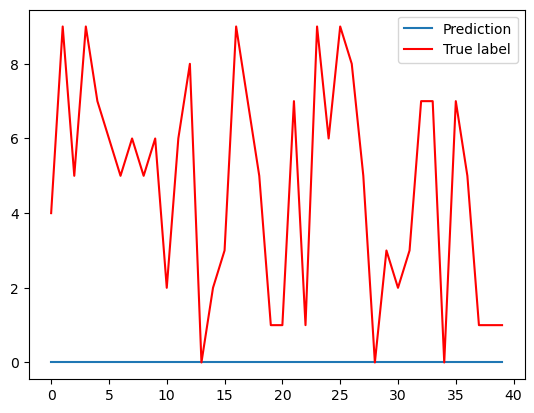

In [49]:
plt.plot(np.argmax(model.predict(X_train[0:40,:]),axis=1),label = 'Prediction')
plt.plot(y_train[0:40],color='r',label='True label')
plt.legend()

2/2 [==============================] - 0s 11ms/step


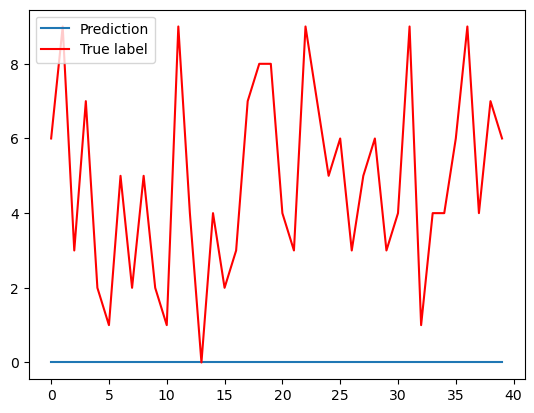

In [50]:
plt.plot(np.argmax(model.predict(X_test[0:40,:]),axis=1),label = 'Prediction')
plt.plot(y_test[0:40],color='r',label='True label')
plt.legend()

In [51]:
model.evaluate(X_train,  oh_y_train, verbose=2)

2022-08-25 19:37:24.959100: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


29/29 - 1s - loss: 2.3015 - accuracy: 0.1069 - 604ms/epoch - 21ms/step


[2.3015379905700684, 0.10690423846244812]

In [52]:
oh_y_test = tf.one_hot(y_test, 10)

model.evaluate(X_test,  oh_y_test, verbose=2)

29/29 - 0s - loss: 2.3068 - accuracy: 0.0912 - 449ms/epoch - 15ms/step


[2.30678653717041, 0.09121246635913849]

You are making me crazy... now what!!!!!!!!



<div class = "alert alert-warning" style = "border-radius:10px;border-width:3px"> 
<b>TAKE HOME IDEA:</b>    

I am sure you know about PAC learning and concentration of measure inequalities and the trade-off between complexity and number of samples. In this case, we have very few samples. How can we synthetically "augment data". Enter the dragon! ... ops... Enter the <b>dropout</b>!

</div>



In [53]:
tf.keras.backend.clear_session()


inputs = tf.keras.Input(shape=(64,))
x = tf.keras.layers.Dropout(0.1)(inputs)
x = tf.keras.layers.Dense(100, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(40, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

oh_y_train = tf.one_hot(y_train, 10)

model.fit(X_train, oh_y_train.numpy(), epochs=750, batch_size = 32)

Epoch 1/750


2022-08-25 19:37:26.853098: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


29/29 [==============================] - 3s 47ms/step - loss: 2.3028 - accuracy: 0.0902
Epoch 2/750
29/29 [==============================] - 1s 25ms/step - loss: 2.3026 - accuracy: 0.0913
Epoch 3/750
29/29 [==============================] - 1s 24ms/step - loss: 2.3026 - accuracy: 0.1047
Epoch 4/750
29/29 [==============================] - 1s 24ms/step - loss: 2.3025 - accuracy: 0.1036
Epoch 5/750
29/29 [==============================] - 1s 24ms/step - loss: 2.3025 - accuracy: 0.0935
Epoch 6/750
29/29 [==============================] - 1s 24ms/step - loss: 2.3024 - accuracy: 0.0947
Epoch 7/750
29/29 [==============================] - 1s 24ms/step - loss: 2.3024 - accuracy: 0.0991
Epoch 8/750
29/29 [==============================] - 1s 24ms/step - loss: 2.3023 - accuracy: 0.0980
Epoch 9/750
29/29 [==============================] - 1s 24ms/step - loss: 2.3023 - accuracy: 0.1036
Epoch 10/750
29/29 [==============================] - 1s 26ms/step - loss: 2.3023 - accuracy: 0.0880
Epoch 11/75

29/29 [==============================] - 1s 24ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 83/750
29/29 [==============================] - 1s 24ms/step - loss: 2.3017 - accuracy: 0.0991
Epoch 84/750
29/29 [==============================] - 1s 24ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 85/750
29/29 [==============================] - 1s 24ms/step - loss: 2.3016 - accuracy: 0.1069
Epoch 86/750
29/29 [==============================] - 1s 24ms/step - loss: 2.3017 - accuracy: 0.0969
Epoch 87/750
29/29 [==============================] - 1s 24ms/step - loss: 2.3017 - accuracy: 0.1047
Epoch 88/750
29/29 [==============================] - 1s 24ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 89/750
29/29 [==============================] - 1s 24ms/step - loss: 2.3017 - accuracy: 0.1069
Epoch 90/750
29/29 [==============================] - 1s 24ms/step - loss: 2.3017 - accuracy: 0.1013
Epoch 91/750
29/29 [==============================] - 1s 24ms/step - loss: 2.3016 - accuracy: 0.1080
Epo

29/29 [==============================] - 1s 25ms/step - loss: 2.3016 - accuracy: 0.1069
Epoch 163/750
29/29 [==============================] - 1s 25ms/step - loss: 2.3016 - accuracy: 0.1069
Epoch 164/750
29/29 [==============================] - 1s 25ms/step - loss: 2.3016 - accuracy: 0.1069
Epoch 165/750
29/29 [==============================] - 1s 24ms/step - loss: 2.3016 - accuracy: 0.1069
Epoch 166/750
29/29 [==============================] - 1s 24ms/step - loss: 2.3016 - accuracy: 0.1069
Epoch 167/750
29/29 [==============================] - 1s 25ms/step - loss: 2.3016 - accuracy: 0.1069
Epoch 168/750
29/29 [==============================] - 1s 24ms/step - loss: 2.3016 - accuracy: 0.1069
Epoch 169/750
29/29 [==============================] - 1s 24ms/step - loss: 2.3016 - accuracy: 0.1069
Epoch 170/750
29/29 [==============================] - 1s 24ms/step - loss: 2.3016 - accuracy: 0.1069
Epoch 171/750
29/29 [==============================] - 1s 24ms/step - loss: 2.3016 - accuracy: 0

29/29 [==============================] - 1s 24ms/step - loss: 2.3015 - accuracy: 0.1069
Epoch 243/750
29/29 [==============================] - 1s 24ms/step - loss: 2.3015 - accuracy: 0.1069
Epoch 244/750
29/29 [==============================] - 1s 24ms/step - loss: 2.3016 - accuracy: 0.1069
Epoch 245/750
29/29 [==============================] - 1s 24ms/step - loss: 2.3016 - accuracy: 0.1069
Epoch 246/750
29/29 [==============================] - 1s 24ms/step - loss: 2.3016 - accuracy: 0.1069
Epoch 247/750
29/29 [==============================] - 1s 23ms/step - loss: 2.3016 - accuracy: 0.1069
Epoch 248/750
29/29 [==============================] - 1s 26ms/step - loss: 2.3014 - accuracy: 0.1069
Epoch 249/750
29/29 [==============================] - 1s 24ms/step - loss: 2.3015 - accuracy: 0.1069
Epoch 250/750
29/29 [==============================] - 1s 23ms/step - loss: 2.3014 - accuracy: 0.1069
Epoch 251/750
29/29 [==============================] - 1s 24ms/step - loss: 2.3014 - accuracy: 0

29/29 [==============================] - 1s 24ms/step - loss: 2.2968 - accuracy: 0.1080
Epoch 323/750
29/29 [==============================] - 1s 25ms/step - loss: 2.2966 - accuracy: 0.1080
Epoch 324/750
29/29 [==============================] - 1s 25ms/step - loss: 2.2951 - accuracy: 0.1169
Epoch 325/750
29/29 [==============================] - 1s 24ms/step - loss: 2.2953 - accuracy: 0.1169
Epoch 326/750
29/29 [==============================] - 1s 24ms/step - loss: 2.2945 - accuracy: 0.1102
Epoch 327/750
29/29 [==============================] - 1s 24ms/step - loss: 2.2937 - accuracy: 0.1203
Epoch 328/750
29/29 [==============================] - 1s 24ms/step - loss: 2.2937 - accuracy: 0.1114
Epoch 329/750
29/29 [==============================] - 1s 24ms/step - loss: 2.2936 - accuracy: 0.1192
Epoch 330/750
29/29 [==============================] - 1s 24ms/step - loss: 2.2924 - accuracy: 0.1036
Epoch 331/750
29/29 [==============================] - 1s 24ms/step - loss: 2.2912 - accuracy: 0

29/29 [==============================] - 1s 24ms/step - loss: 1.8593 - accuracy: 0.2517
Epoch 403/750
29/29 [==============================] - 1s 24ms/step - loss: 1.7999 - accuracy: 0.2762
Epoch 404/750
29/29 [==============================] - 1s 24ms/step - loss: 1.8504 - accuracy: 0.2650
Epoch 405/750
29/29 [==============================] - 1s 24ms/step - loss: 1.9279 - accuracy: 0.2238
Epoch 406/750
29/29 [==============================] - 1s 24ms/step - loss: 1.9001 - accuracy: 0.2283
Epoch 407/750
29/29 [==============================] - 1s 24ms/step - loss: 1.8273 - accuracy: 0.2483
Epoch 408/750
29/29 [==============================] - 1s 24ms/step - loss: 1.8365 - accuracy: 0.2472
Epoch 409/750
29/29 [==============================] - 1s 25ms/step - loss: 1.8092 - accuracy: 0.2817
Epoch 410/750
29/29 [==============================] - 1s 24ms/step - loss: 1.8330 - accuracy: 0.2617
Epoch 411/750
29/29 [==============================] - 1s 24ms/step - loss: 1.7904 - accuracy: 0

29/29 [==============================] - 1s 25ms/step - loss: 1.5789 - accuracy: 0.4131
Epoch 483/750
29/29 [==============================] - 1s 24ms/step - loss: 1.4705 - accuracy: 0.4220
Epoch 484/750
29/29 [==============================] - 1s 25ms/step - loss: 1.4575 - accuracy: 0.4220
Epoch 485/750
29/29 [==============================] - 1s 25ms/step - loss: 1.5308 - accuracy: 0.4042
Epoch 486/750
29/29 [==============================] - 1s 24ms/step - loss: 1.4906 - accuracy: 0.4321
Epoch 487/750
29/29 [==============================] - 1s 24ms/step - loss: 1.4962 - accuracy: 0.4287
Epoch 488/750
29/29 [==============================] - 1s 25ms/step - loss: 1.5034 - accuracy: 0.4287
Epoch 489/750
29/29 [==============================] - 1s 25ms/step - loss: 1.5563 - accuracy: 0.4165
Epoch 490/750
29/29 [==============================] - 1s 25ms/step - loss: 1.4949 - accuracy: 0.4365
Epoch 491/750
29/29 [==============================] - 1s 24ms/step - loss: 1.4668 - accuracy: 0

29/29 [==============================] - 1s 24ms/step - loss: 1.3567 - accuracy: 0.4788
Epoch 563/750
29/29 [==============================] - 1s 24ms/step - loss: 1.4171 - accuracy: 0.4532
Epoch 564/750
29/29 [==============================] - 1s 24ms/step - loss: 1.3823 - accuracy: 0.4766
Epoch 565/750
29/29 [==============================] - 1s 24ms/step - loss: 1.4117 - accuracy: 0.4666
Epoch 566/750
29/29 [==============================] - 1s 24ms/step - loss: 1.4346 - accuracy: 0.4655
Epoch 567/750
29/29 [==============================] - 1s 24ms/step - loss: 1.3542 - accuracy: 0.5033
Epoch 568/750
29/29 [==============================] - 1s 24ms/step - loss: 1.4783 - accuracy: 0.4388
Epoch 569/750
29/29 [==============================] - 1s 24ms/step - loss: 1.3954 - accuracy: 0.4454
Epoch 570/750
29/29 [==============================] - 1s 24ms/step - loss: 1.4575 - accuracy: 0.4555
Epoch 571/750
29/29 [==============================] - 1s 24ms/step - loss: 1.4126 - accuracy: 0

29/29 [==============================] - 1s 24ms/step - loss: 1.0978 - accuracy: 0.5612
Epoch 643/750
29/29 [==============================] - 1s 25ms/step - loss: 1.0779 - accuracy: 0.5958
Epoch 644/750
29/29 [==============================] - 1s 25ms/step - loss: 1.1469 - accuracy: 0.5690
Epoch 645/750
29/29 [==============================] - 1s 24ms/step - loss: 1.1006 - accuracy: 0.5958
Epoch 646/750
29/29 [==============================] - 1s 25ms/step - loss: 1.1900 - accuracy: 0.5646
Epoch 647/750
29/29 [==============================] - 1s 25ms/step - loss: 1.0825 - accuracy: 0.5891
Epoch 648/750
29/29 [==============================] - 1s 25ms/step - loss: 1.0722 - accuracy: 0.5657
Epoch 649/750
29/29 [==============================] - 1s 26ms/step - loss: 1.2076 - accuracy: 0.5546
Epoch 650/750
29/29 [==============================] - 1s 25ms/step - loss: 1.1241 - accuracy: 0.5802
Epoch 651/750
29/29 [==============================] - 1s 25ms/step - loss: 1.1155 - accuracy: 0

29/29 [==============================] - 1s 24ms/step - loss: 1.1863 - accuracy: 0.5601
Epoch 723/750
29/29 [==============================] - 1s 24ms/step - loss: 1.1506 - accuracy: 0.5846
Epoch 724/750
29/29 [==============================] - 1s 24ms/step - loss: 1.3135 - accuracy: 0.5312
Epoch 725/750
29/29 [==============================] - 1s 24ms/step - loss: 1.2529 - accuracy: 0.5546
Epoch 726/750
29/29 [==============================] - 1s 24ms/step - loss: 1.1567 - accuracy: 0.5791
Epoch 727/750
29/29 [==============================] - 1s 24ms/step - loss: 1.2527 - accuracy: 0.5546
Epoch 728/750
29/29 [==============================] - 1s 24ms/step - loss: 1.1946 - accuracy: 0.5958
Epoch 729/750
29/29 [==============================] - 1s 23ms/step - loss: 1.0943 - accuracy: 0.6002
Epoch 730/750
29/29 [==============================] - 1s 24ms/step - loss: 1.1164 - accuracy: 0.5947
Epoch 731/750
29/29 [==============================] - 1s 24ms/step - loss: 1.0468 - accuracy: 0

1/2 [==============>...............] - ETA: 0s

2022-08-25 19:46:13.308279: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 108ms/step


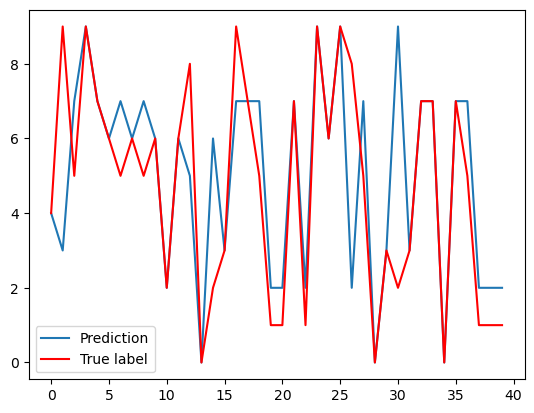

In [54]:
plt.plot(np.argmax(model.predict(X_train[0:40,:]),axis=1),label = 'Prediction')
plt.plot(y_train[0:40],color='r',label='True label')
plt.legend()

In [55]:
model.evaluate(X_train,  oh_y_train, verbose=2)

2022-08-25 19:46:13.776168: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


29/29 - 1s - loss: 1.3100 - accuracy: 0.4465 - 759ms/epoch - 26ms/step


[1.3099678754806519, 0.44654789566993713]

2/2 [==============================] - 0s 14ms/step


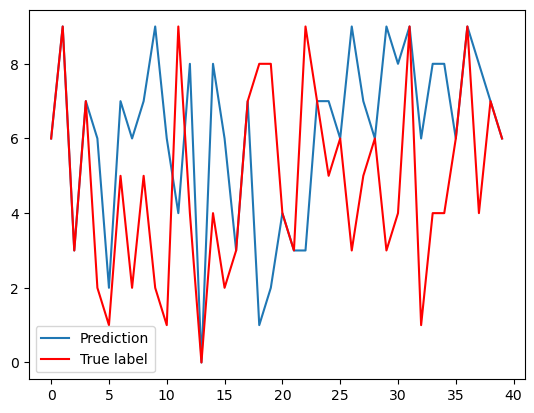

In [56]:
plt.plot(np.argmax(model.predict(X_test[0:40,:]),axis=1),label = 'Prediction')
plt.plot(y_test[0:40],color='r',label='True label')
plt.legend()

In [57]:
oh_y_test = tf.one_hot(y_test, 10)

model.evaluate(X_test,  oh_y_test, verbose=2)

29/29 - 0s - loss: 1.3301 - accuracy: 0.4505 - 358ms/epoch - 12ms/step


[1.3301379680633545, 0.45050057768821716]



<div class = "alert alert-warning" style = "border-radius:10px;border-width:3px"> 
<b>Oh my ... This is just AWESOME!!!!! We recovered some prediction power!!!!</b>    
</div>



## Interpreting deep learning as feature representations 



<div class = "alert alert-info" style = "border-radius:10px;border-width:3px"> 
<b>THE FINAL AND MOST IMPORTANT TAKE HOME IDEA:</b>    
    
Deep learning is all about learning representations. As a classifier it is a fiasco. But then... how does it work so well? Because all layers up to the last one can be interpreted as transformations of the data. And just the last layer is the classification step. For examples in the case of soft-max the decision boundary is linear. This is a really simple classifier, thus if the network is to work well the transformation must be such that a linear classifier is able to perform well enough.

<b>This is really what deep learning is about!</b>
</div>



Let us check this out. We will recover a relative ok classification such as the last model trained, slice the last layer, and replace it with a real classifier... and see what happens.

First, let us access the last layer representation:

In [58]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64)]              0         
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 100)               6500      
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 40)                4040      
                                                                 
 batch_normalization_1 (Batc  (None, 40)               160       
 hNormalization)                                             

In [59]:
from tensorflow.keras import backend as K

# with a Sequential model
inp = model.input  
get_batch_output = K.function(inp,[model.layers[0].output])
batch_output = get_batch_output(X_train)

In [60]:
batch_output

[array([[0.    , 0.    , 0.    , ..., 0.375 , 0.    , 0.    ],
        [0.    , 0.    , 0.5625, ..., 0.375 , 0.    , 0.    ],
        [0.    , 0.0625, 0.5   , ..., 0.    , 0.    , 0.    ],
        ...,
        [0.    , 0.    , 0.5625, ..., 1.    , 0.125 , 0.    ],
        [0.    , 0.    , 0.0625, ..., 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.0625, ..., 0.0625, 0.    , 0.    ]],
       dtype=float32)]

In [61]:
from sklearn import ensemble

clf = ensemble.RandomForestClassifier(101)
clf.fit(batch_output[0],y_train)

RandomForestClassifier(n_estimators=101)

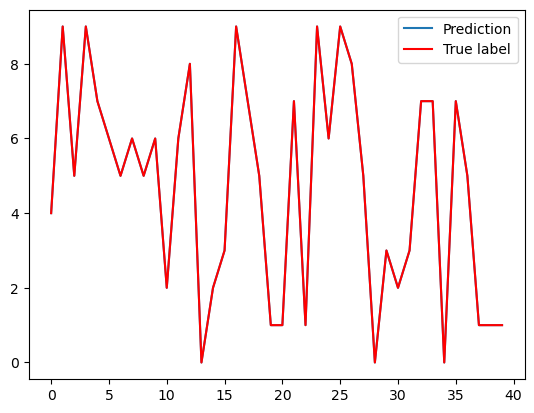

In [62]:
bo = batch_output[0]
plt.plot(clf.predict(bo[0:40,:]),label = 'Prediction')
plt.plot(y_train[0:40],color='r',label='True label')
plt.legend()

In [63]:
np.mean(np.where(np.abs(clf.predict(bo)-y_train)<1e-6,1.,0.))

1.0

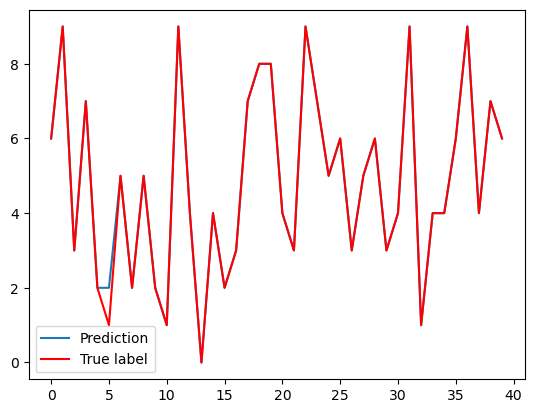

In [64]:
batch_output = get_batch_output(X_test)

bo = batch_output[0]
plt.plot(clf.predict(bo[0:40,:]),label = 'Prediction')
plt.plot(y_test[0:40],color='r',label='True label')
plt.legend()

In [65]:
np.mean(np.where(np.abs(clf.predict(bo)-y_test)<1e-6,1.,0.))

0.9621802002224694

# Recap exercise



<div class = "alert alert-success" style = "border-radius:10px;border-width:3px"> 
<b>EXERCISE: </b> It is your turn to code a deep feed forward neural network to solve the problem of classifying fashion images.
    
<b>RULES: </b> Solve the problem with maximum accuracy but with the smallest amount of <b>trainable parameters</b>. To check the amount of parameters use ```model.summary()```.
</div>



In [56]:
#Load data set

import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Label:9
Number of unique labels: [0 1 2 3 4 5 6 7 8 9]
Data set size: (60000, 28, 28)


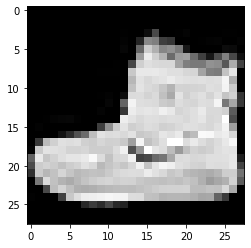

In [57]:
%matplotlib inline

#Check some basic info
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(train_images[0],cmap='gray')
print('Label:'+str(train_labels[0]))
print('Number of unique labels: '+str(np.unique(train_labels)))
print('Data set size: ' + str(train_images.shape))

In [58]:
#Rasterize data

X_train = np.reshape(train_images,(train_images.shape[0],train_images.shape[1]*train_images.shape[2]))
y_train = train_labels
X_test = np.reshape(test_images,(test_images.shape[0],test_images.shape[1]*test_images.shape[2]))
y_test = test_labels


In [59]:
X_test.shape

(10000, 784)

In [60]:
#Use X_train, y_train, X_test, y_test to code your deep learning code